# Hackathon - Reto 01: Housing Dreams
Autor:
Daniel E. Ramírez

El presente archivo compila primer reto del Hackathon de la carrera de Data Science de Henry, generar un modelo predictivo de precios de bienes raíces a partir de un dataset. Esta etapa se divide, a su vez, en los pasos que se detallan a continuación:
1. Importación de liberías a utilizar
2. Carga de datos
3. Análisis exploratorio
4. Preprocesamiento
5. Modelado
6. Evaluación
7. Predicción

### Paso 1: Importación de librerías

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

### Paso 2: Carga de Datos

In [3]:
df = pd.read_csv ('house_train_raw.csv')

### Paso 3: Análisis Exploratorio

a) Se comenzó por revisar la cantidad de registros, columnas, tipos de datos, y valores faltantes

In [15]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
df.iloc[:,:20].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   Alley         91 non-null     object 
 7   LotShape      1460 non-null   object 
 8   LandContour   1460 non-null   object 
 9   Utilities     1460 non-null   object 
 10  LotConfig     1460 non-null   object 
 11  LandSlope     1460 non-null   object 
 12  Neighborhood  1460 non-null   object 
 13  Condition1    1460 non-null   object 
 14  Condition2    1460 non-null   object 
 15  BldgType      1460 non-null   object 
 16  HouseStyle    1460 non-null   object 
 17  OverallQual   1460 non-null   int64  
 18  OverallCond   1460 non-null 

In [13]:
df.iloc[:,20:40].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1460 non-null   int64  
 1   RoofStyle     1460 non-null   object 
 2   RoofMatl      1460 non-null   object 
 3   Exterior1st   1460 non-null   object 
 4   Exterior2nd   1460 non-null   object 
 5   MasVnrType    1452 non-null   object 
 6   MasVnrArea    1452 non-null   float64
 7   ExterQual     1460 non-null   object 
 8   ExterCond     1460 non-null   object 
 9   Foundation    1460 non-null   object 
 10  BsmtQual      1423 non-null   object 
 11  BsmtCond      1423 non-null   object 
 12  BsmtExposure  1422 non-null   object 
 13  BsmtFinType1  1423 non-null   object 
 14  BsmtFinSF1    1460 non-null   int64  
 15  BsmtFinType2  1422 non-null   object 
 16  BsmtFinSF2    1460 non-null   int64  
 17  BsmtUnfSF     1460 non-null   int64  
 18  TotalBsmtSF   1460 non-null 

In [12]:
df.iloc[:,40:60].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HeatingQC     1460 non-null   object 
 1   CentralAir    1460 non-null   object 
 2   Electrical    1459 non-null   object 
 3   1stFlrSF      1460 non-null   int64  
 4   2ndFlrSF      1460 non-null   int64  
 5   LowQualFinSF  1460 non-null   int64  
 6   GrLivArea     1460 non-null   int64  
 7   BsmtFullBath  1460 non-null   int64  
 8   BsmtHalfBath  1460 non-null   int64  
 9   FullBath      1460 non-null   int64  
 10  HalfBath      1460 non-null   int64  
 11  BedroomAbvGr  1460 non-null   int64  
 12  KitchenAbvGr  1460 non-null   int64  
 13  KitchenQual   1460 non-null   object 
 14  TotRmsAbvGrd  1460 non-null   int64  
 15  Functional    1460 non-null   object 
 16  Fireplaces    1460 non-null   int64  
 17  FireplaceQu   770 non-null    object 
 18  GarageType    1379 non-null 

In [28]:
df.iloc[:,60:81].info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GarageFinish   1379 non-null   object
 1   GarageCars     1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   GarageQual     1379 non-null   object
 4   GarageCond     1379 non-null   object
 5   PavedDrive     1460 non-null   object
 6   WoodDeckSF     1460 non-null   int64 
 7   OpenPorchSF    1460 non-null   int64 
 8   EnclosedPorch  1460 non-null   int64 
 9   3SsnPorch      1460 non-null   int64 
 10  ScreenPorch    1460 non-null   int64 
 11  PoolArea       1460 non-null   int64 
 12  PoolQC         7 non-null      object
 13  Fence          281 non-null    object
 14  MiscFeature    54 non-null     object
 15  MiscVal        1460 non-null   int64 
 16  MoSold         1460 non-null   int64 
 17  YrSold         1460 non-null   int64 
 18  SaleType       1460 non-null

b) Selección de features

Se tienen 81 columnas de las cuales 80 son features y 1 es nuestro target (SalePrice). 80 features son... bastantes, muchos más de los que hemos trabajado anteriormente en cualquier otro proyecto, así que la primera tarea será identificar cuáles no son relevantes para descartarlos y poder pasar a la siguiente fase, preprocesamiento. Analizaremos una por una (sigh), empleando principalmente un scatter plot del precio de venta (SalePrice) sobre el área habitable (GrLiveArea) en las variables categóricas

1. Id

In [9]:
df.Id.nunique()

1460

Esta primera columna es el Identificador único de cada propiedad. No guarda ninguna relación con la variable objetivo, así que será descartada

2. MSSubClass: Variable categórica nominal. La información contenida combina el tipo de edificación junto con la época en que fue construida, lo que se encuentra en otras dos columnas. Se presume redundante

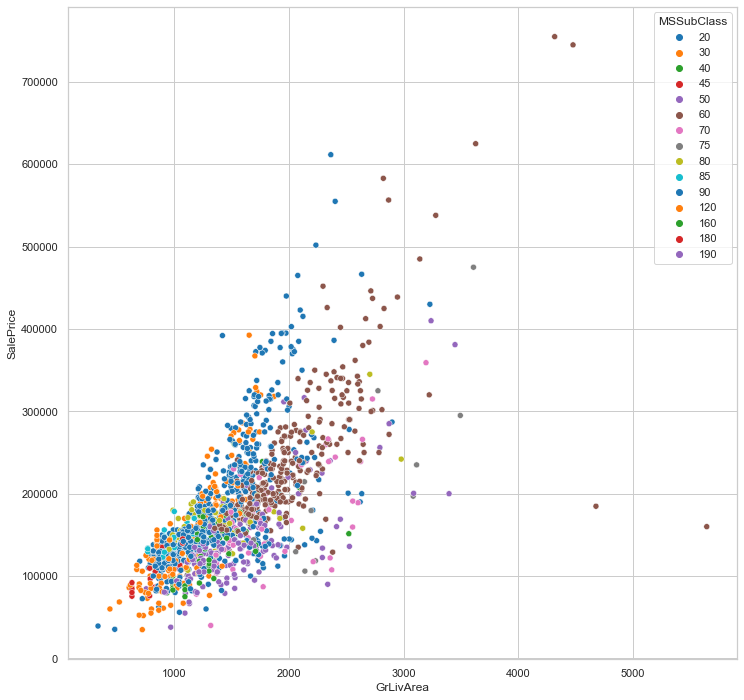

In [29]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.MSSubClass,palette="tab10")
plt.show()

Sí parece haber relación entre precio de venta y esta variable. Pero como se mencionó anteriormente, se tienen otras dos columnas con esta información, así que se descarta

3. MSZoning: variable categórica nominal

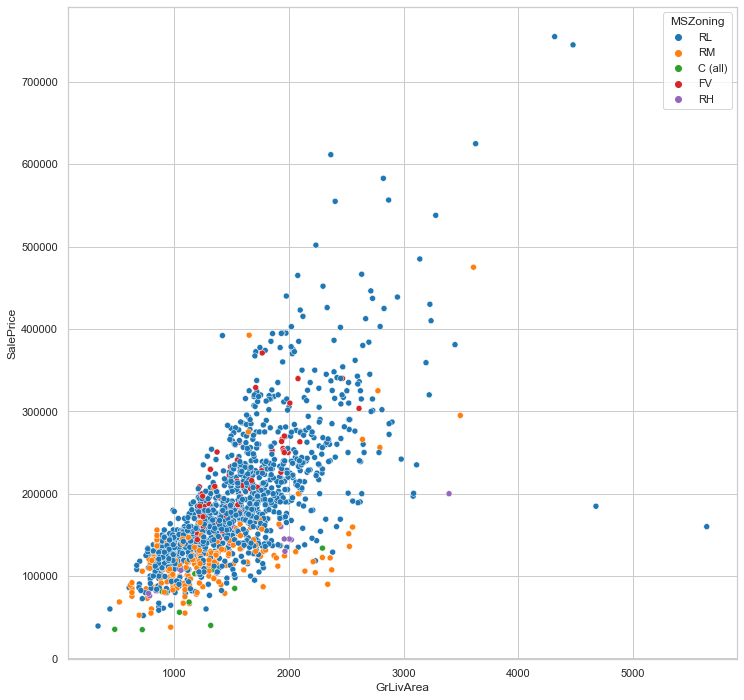

In [30]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.MSZoning,palette="tab10")
plt.show()

Se mantiene. Se debe codificar

4. LotFrontage: variable numérica

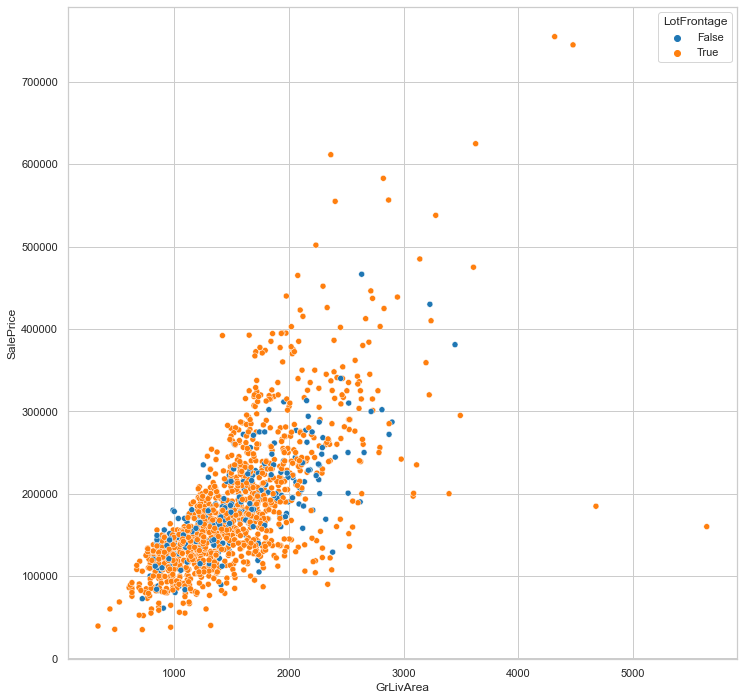

In [31]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=(df.LotFrontage > 0),palette="tab10")
plt.show()

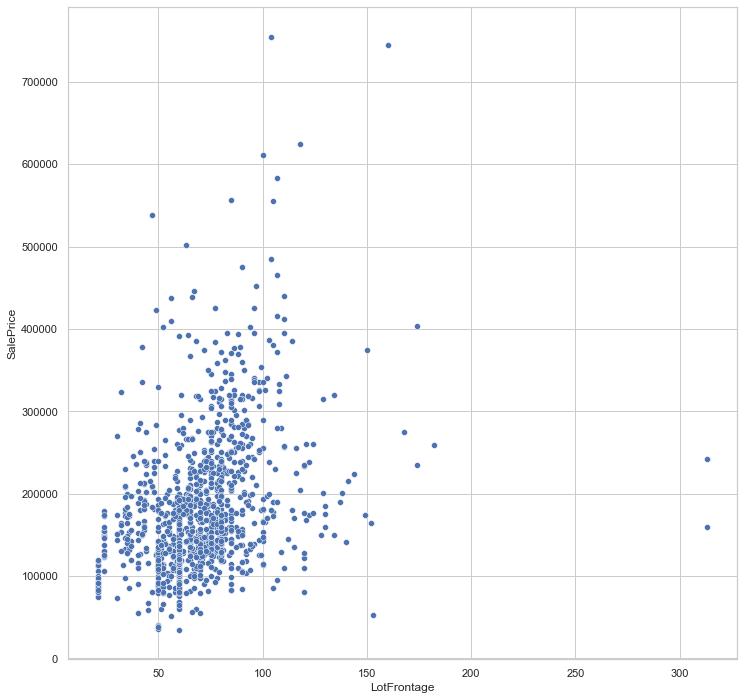

In [3]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.LotFrontage, y=df.SalePrice,palette="tab10")
plt.show()

No parece haber relación entre esta columna y el precio final. Se descarta por los momentos

5. LotArea: variable numérica

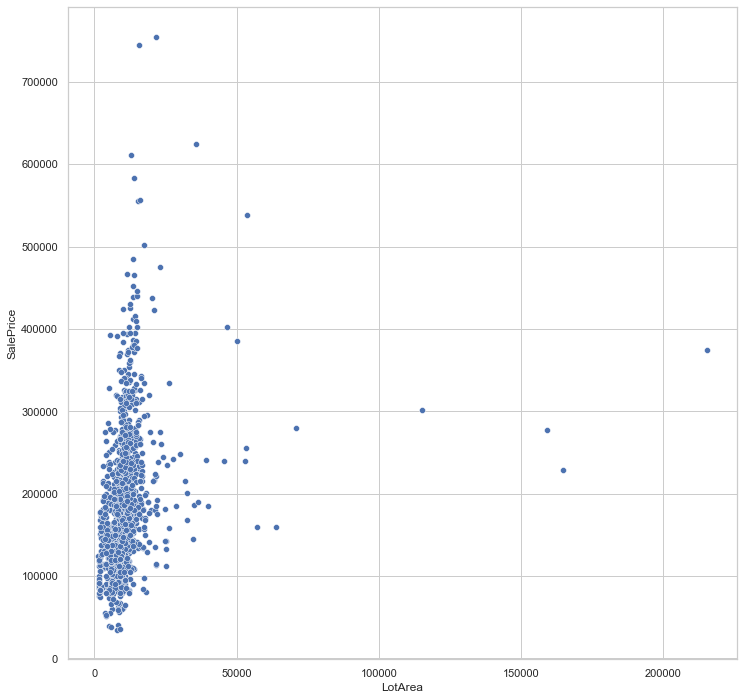

In [4]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.LotArea, y=df.SalePrice,palette="tab10")
plt.show()

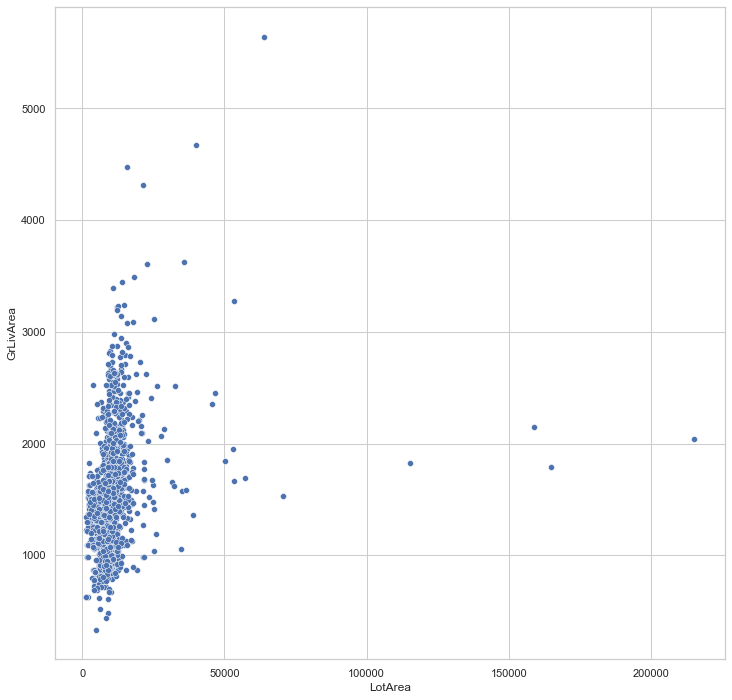

In [33]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.LotArea, y=df.GrLivArea,palette="tab10")
plt.show()

Tampoco parece haber relación entre esta variable y el precio de venta. No obstante, por representar el tamaño del terreno donde se sitúa la propiedad, se considerará para el modelo

6. Street: variable categórica nominal

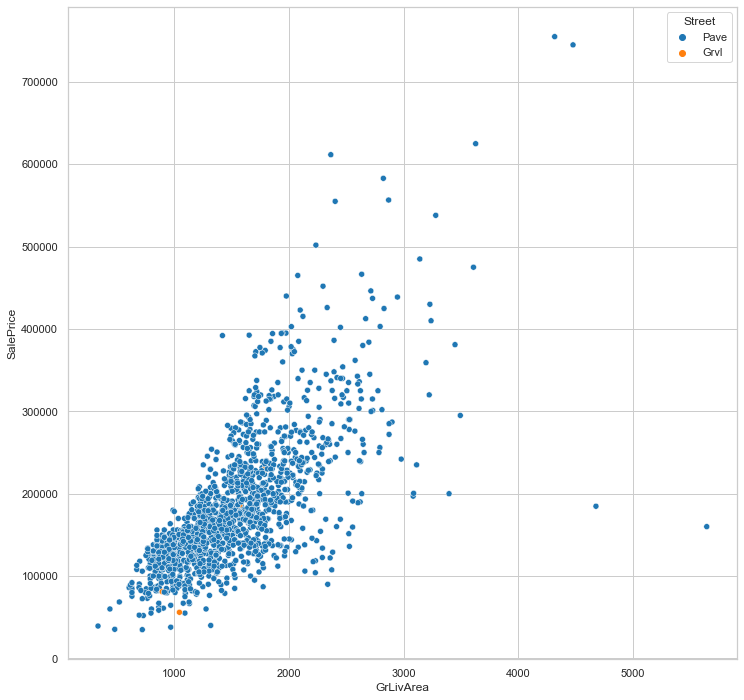

In [5]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Street,palette="tab10")
plt.show()

Se mantiene, pero se transforma a binaria

7. Alley: variable categórica nominal

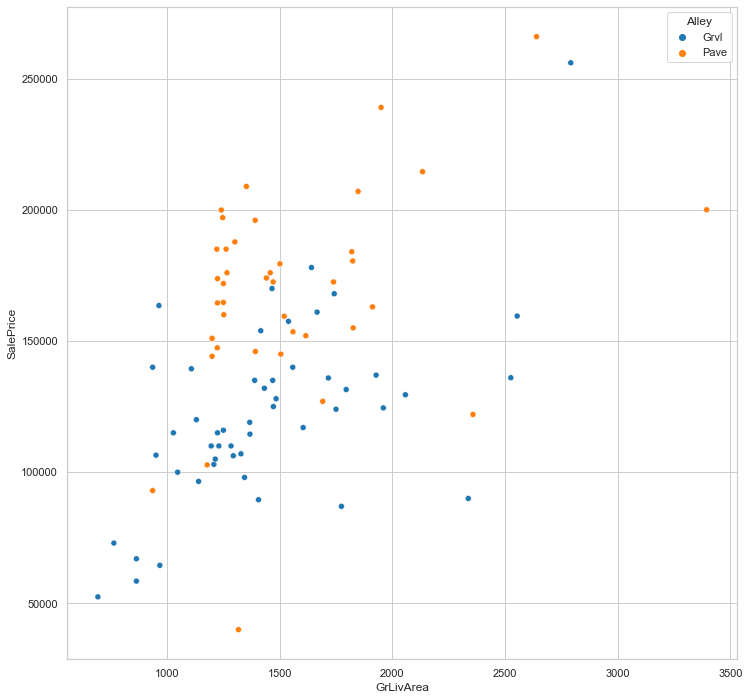

In [6]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Alley,palette="tab10")
plt.show()

Sí pareciera haber una relación entre el tipo de pavimento del callejón con el precio de venta. Sin embargo, se observa lo siguiente cuando se analiza si hay presencia o no de callejón

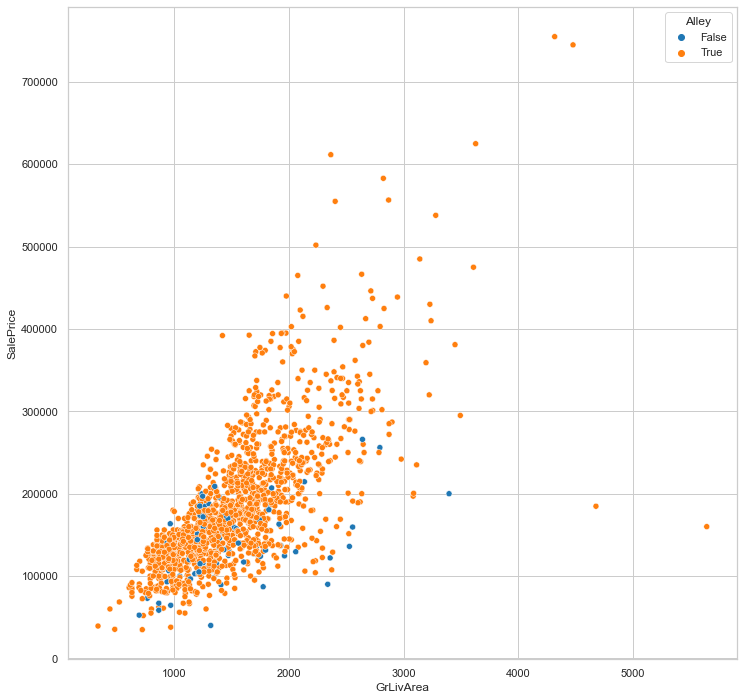

In [7]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=(df.Alley.isna()),palette="tab10")
plt.show()

No parece haber relación entre el precio de venta y si la propiedad tiene o no callejón. Se descarta

8. LotShape: variable categórica nominal

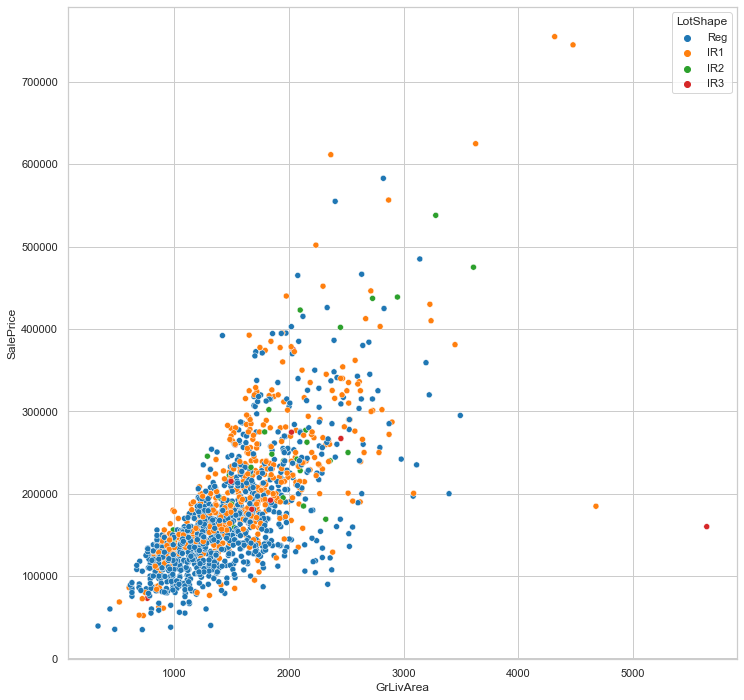

In [8]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.LotShape,palette="tab10")
plt.show()

Sí pareciera existir una relación

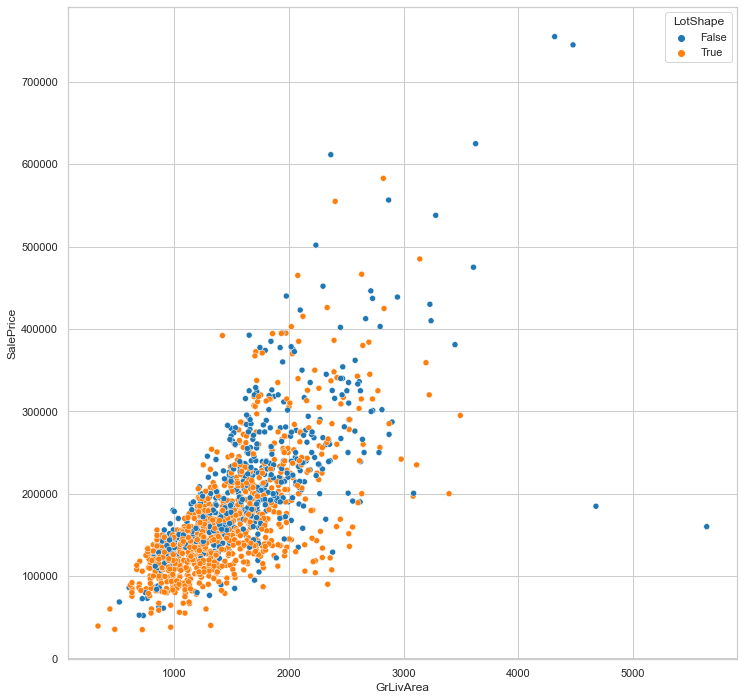

In [9]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=(df.LotShape=='Reg'),palette="tab10")
plt.show()

Sí parece influir. Se mantiene pero se cambia a binaria

9. LandContour: variable categórica nominal

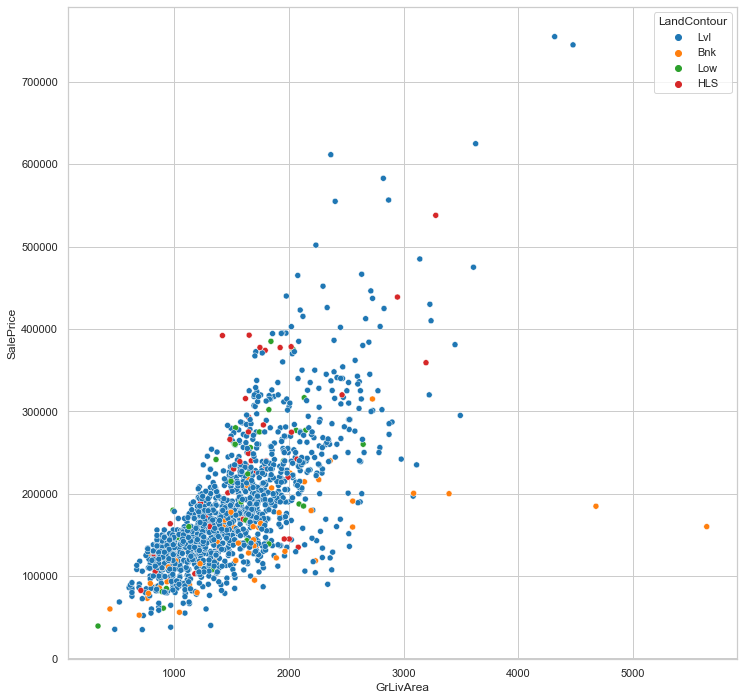

In [10]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.LandContour,palette="tab10")
plt.show()

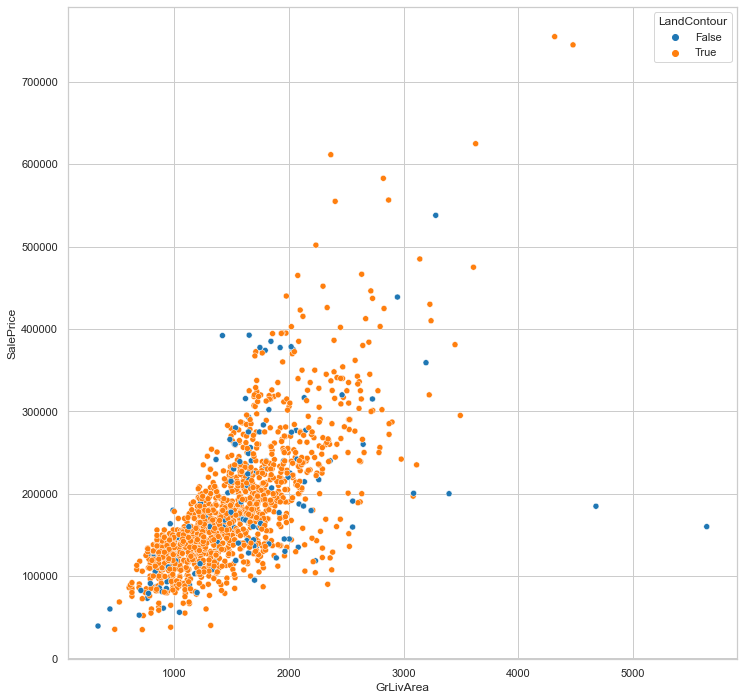

In [11]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=(df.LandContour=='Lvl'),palette="tab10")
plt.show()

Se mantiene, se transforma a binaria 

10. Utilities: variable categórica ordinal

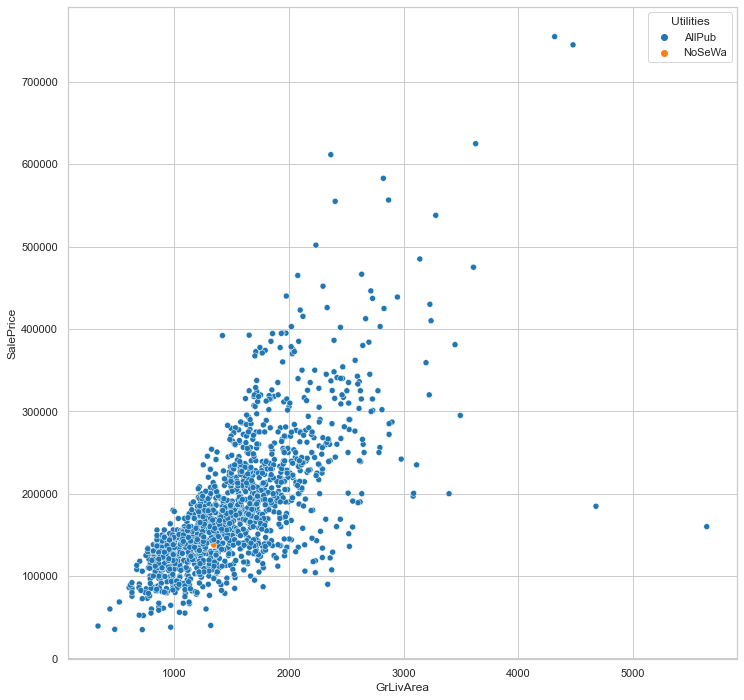

In [12]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Utilities,palette="tab10")
plt.show()

Se mantiene. Se cambia a binaria

11. LotConfig: variable categórica nominal

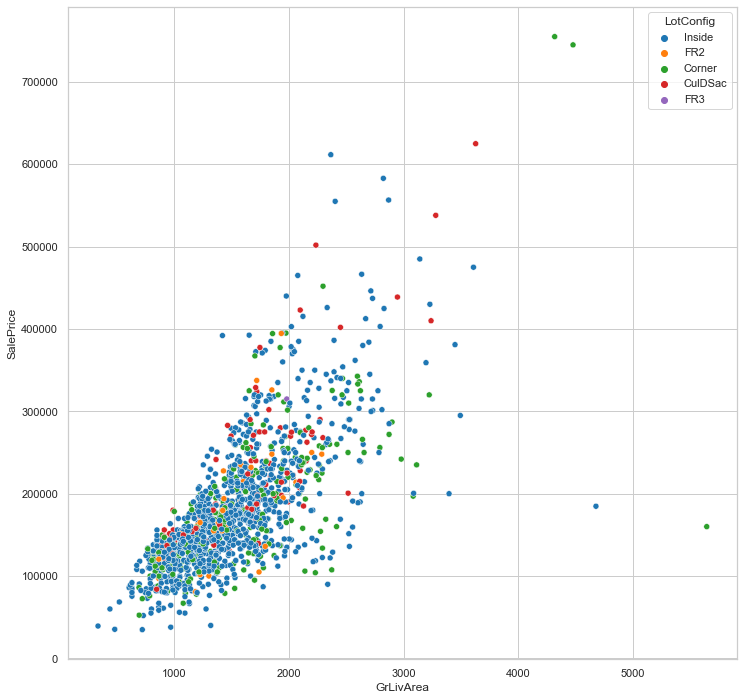

In [14]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.LotConfig,palette="tab10")
plt.show()

No parece haber relación. Se descarta

12. LandSlope: variable categórica ordinal

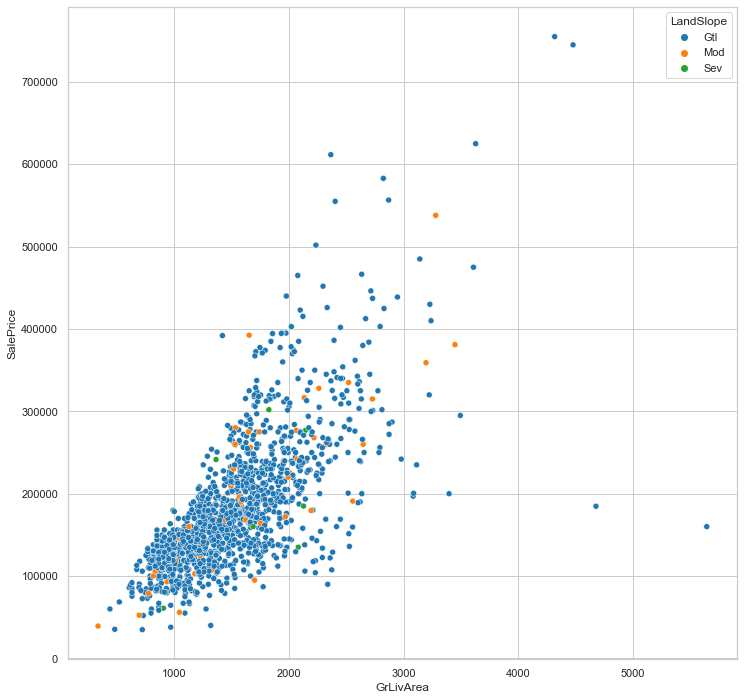

In [15]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.LandSlope,palette="tab10")
plt.show()

Esta variable se relaciona directamente con LandContour, por lo que se decide descartar

13. Neighborhood: variable categórica nominal

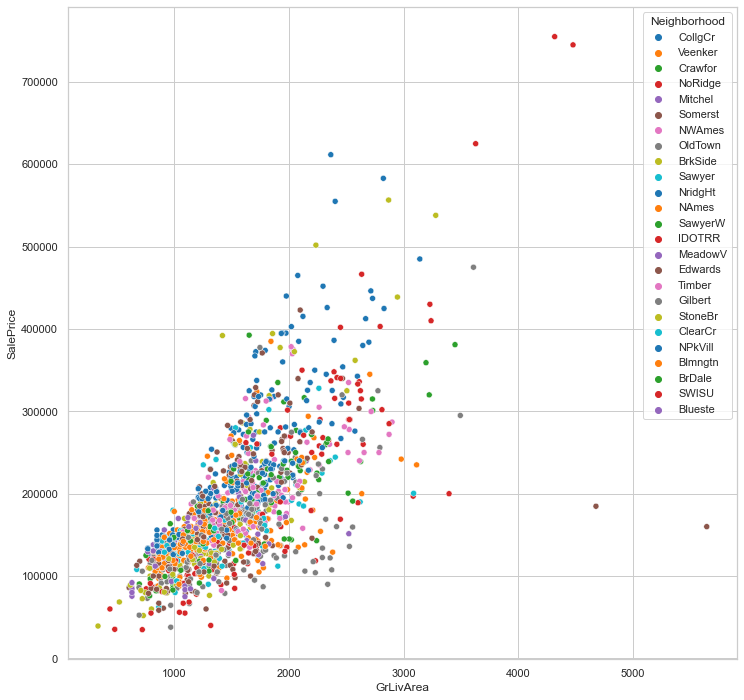

In [16]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Neighborhood,palette="tab10")
plt.show()

Un poco difícil de observar debido a que se repiten los colores, pero sí existe relación entre precio y vecindario. Se mantiene

14. Condition1: variable categórica nominal

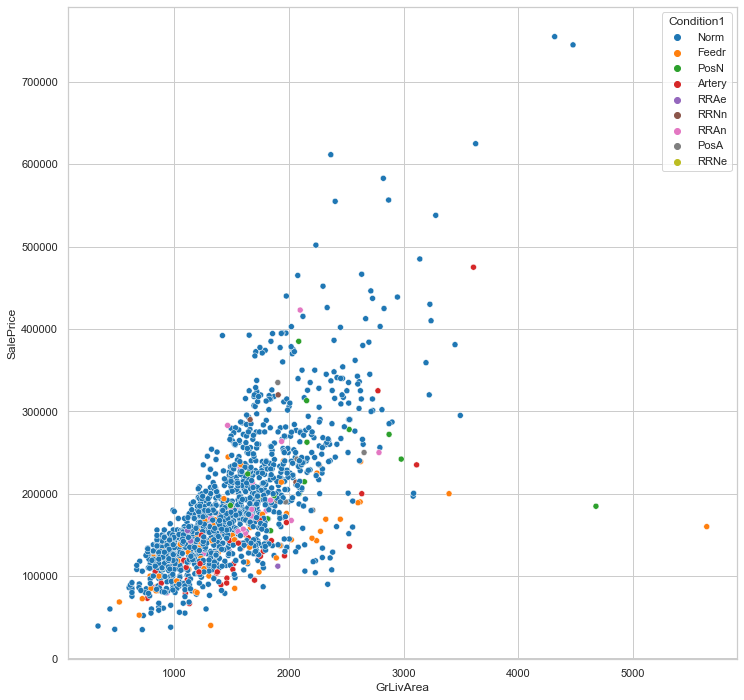

In [19]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Condition1,palette="tab10")
plt.show()

Sí parece haber relación. Para facilitar análisis, se agregarán en 3 categorías: Neg, Norm, y Pos

15. Condition2: variable categórica nominal. Igual a la anterior

16. BldgType: variable categórica nominal

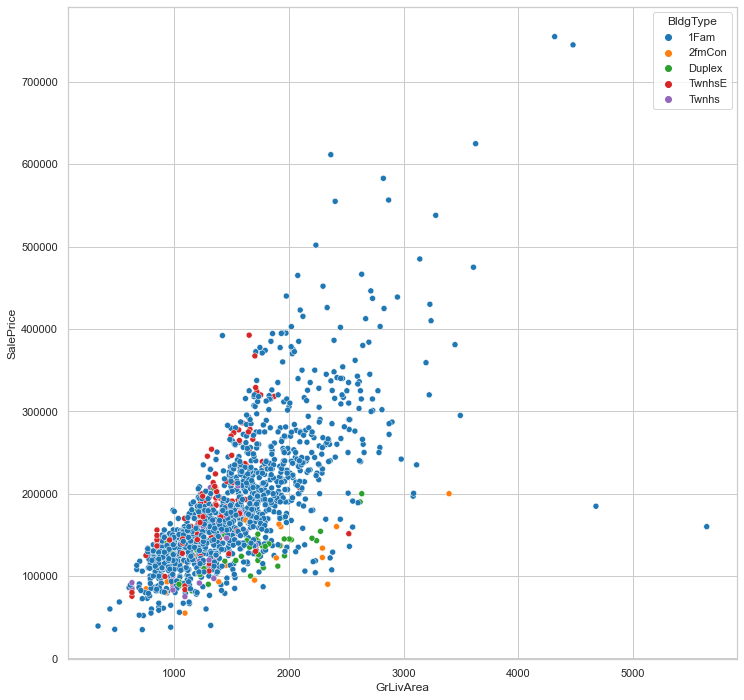

In [20]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.BldgType,palette="tab10")
plt.show()

Existe relación. Si embargo, se agregarán en tres categorías: 1Fam, 2Fam, y Twnhs

17. HouseStyle: variable categórica nominal

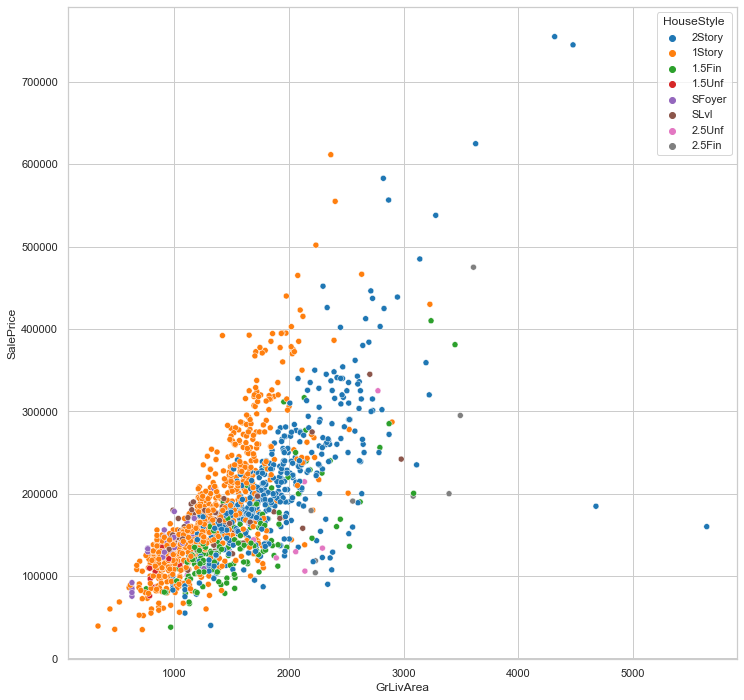

In [21]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.HouseStyle,palette="tab10")
plt.show()

También se agregarán en 5 categorías: 1Story, 1.5St, 2Story, 2.5St, y Split

18. OverallQual: variable categórica ordinal

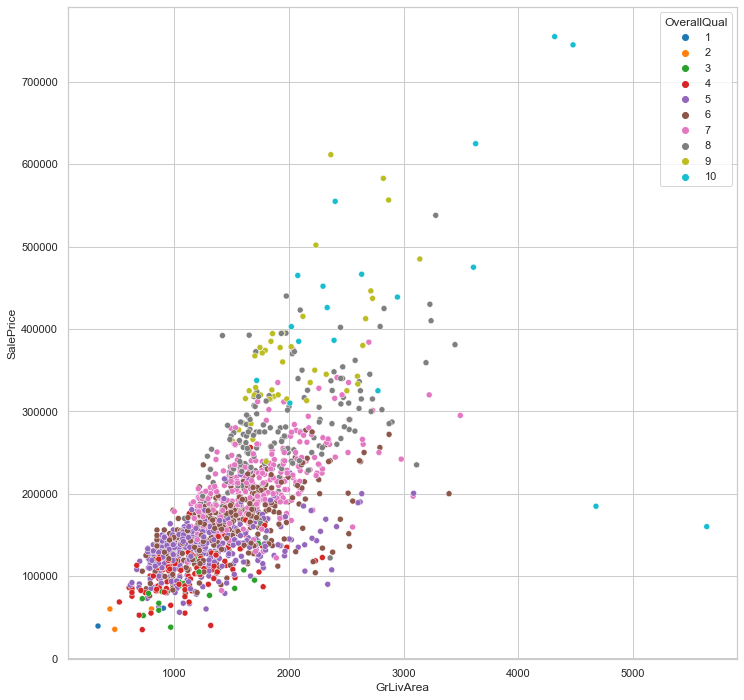

In [22]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.OverallQual,palette="tab10")
plt.show()

Se mantiene

19. OverallCond: variable categórica ordinal

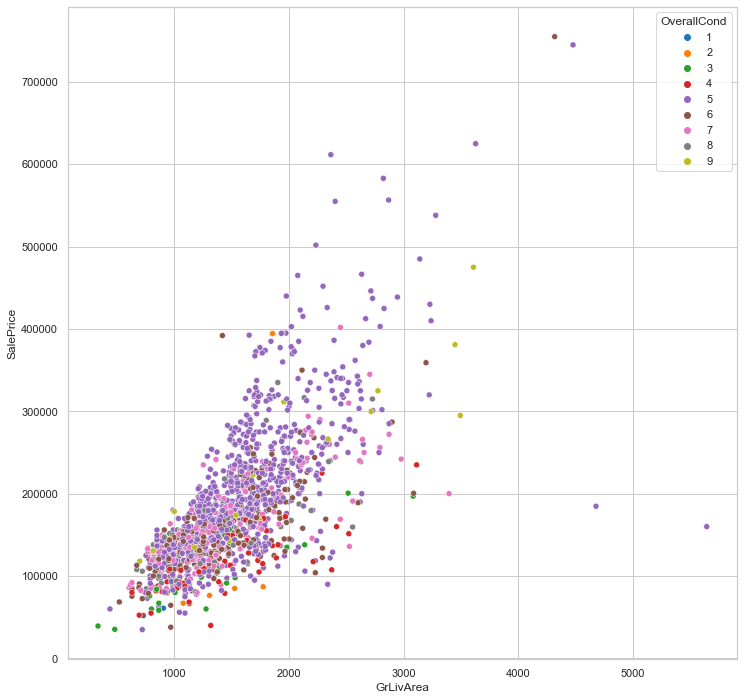

In [23]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.OverallCond,palette="tab10")
plt.show()

Se mantiene

20. YearBuilt: variable numérica

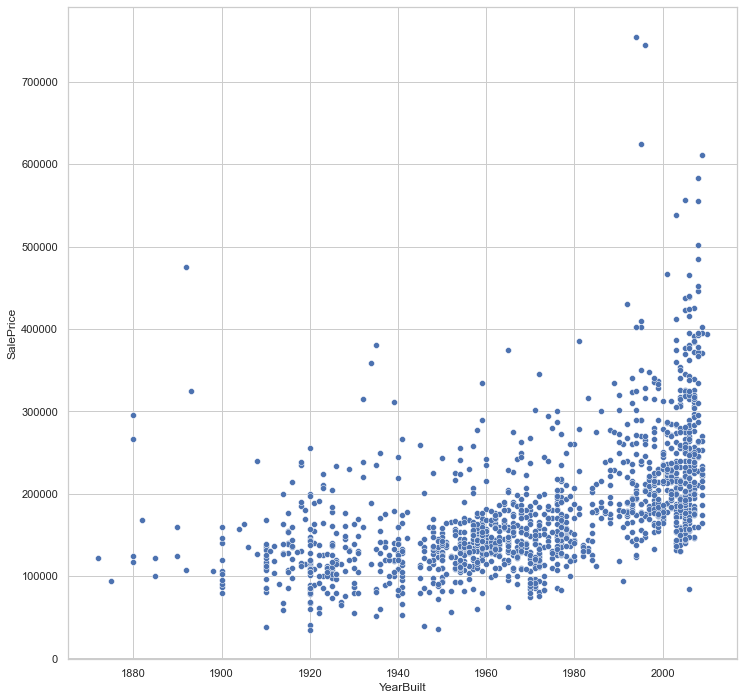

In [25]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.YearBuilt, y=df.SalePrice,palette="tab10")
plt.show()

Se mantiene

21. YearRemodAdd: variable numérica

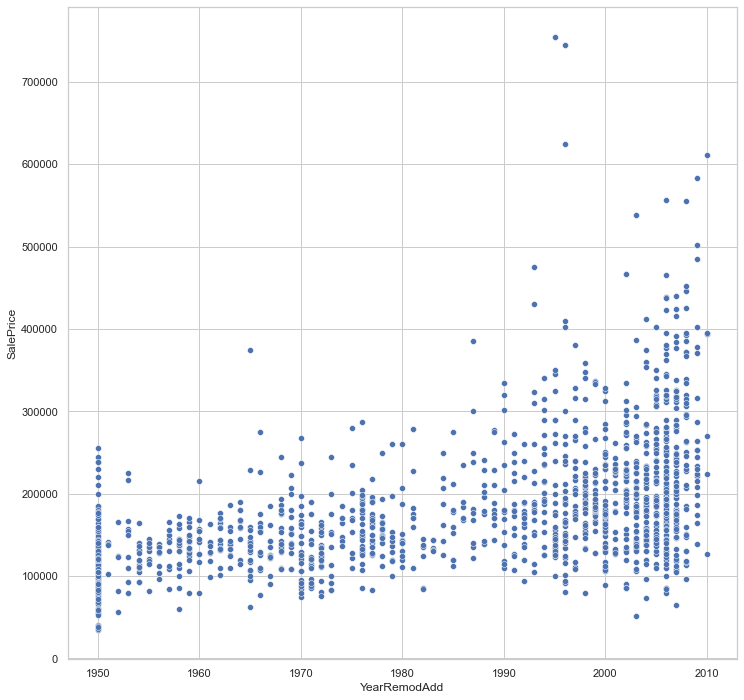

In [26]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.YearRemodAdd, y=df.SalePrice,palette="tab10")
plt.show()

Se mantiene

22. RoofStyle: variable categórica nominal

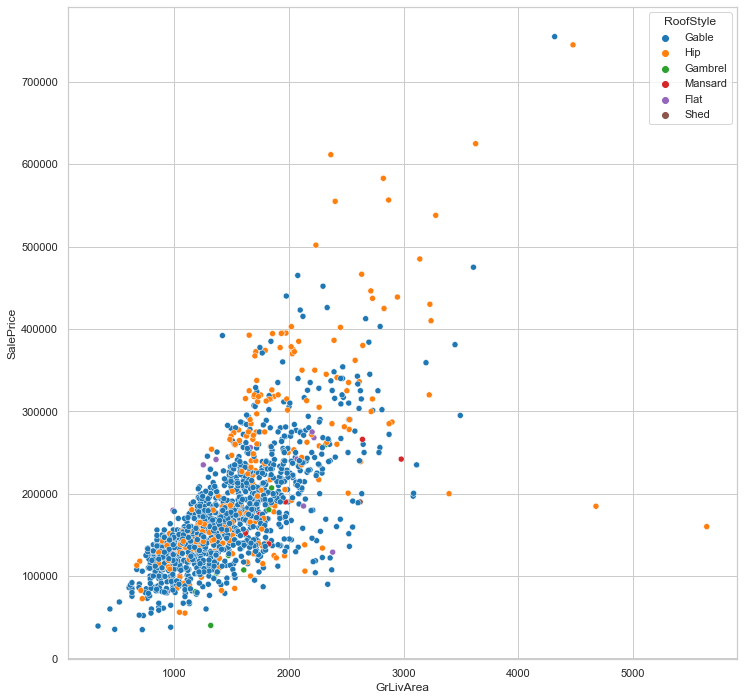

In [27]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.RoofStyle,palette="tab10")
plt.show()

Se descarta

23. RoofMatl: variable categórica nominal

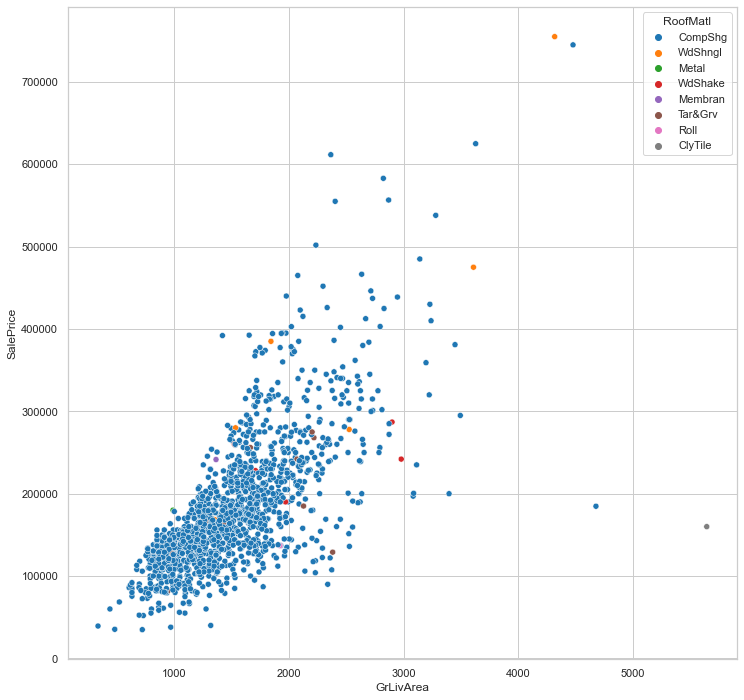

In [28]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.RoofMatl,palette="tab10")
plt.show()

Se descarta

24. Exterior1st: categórica nominal

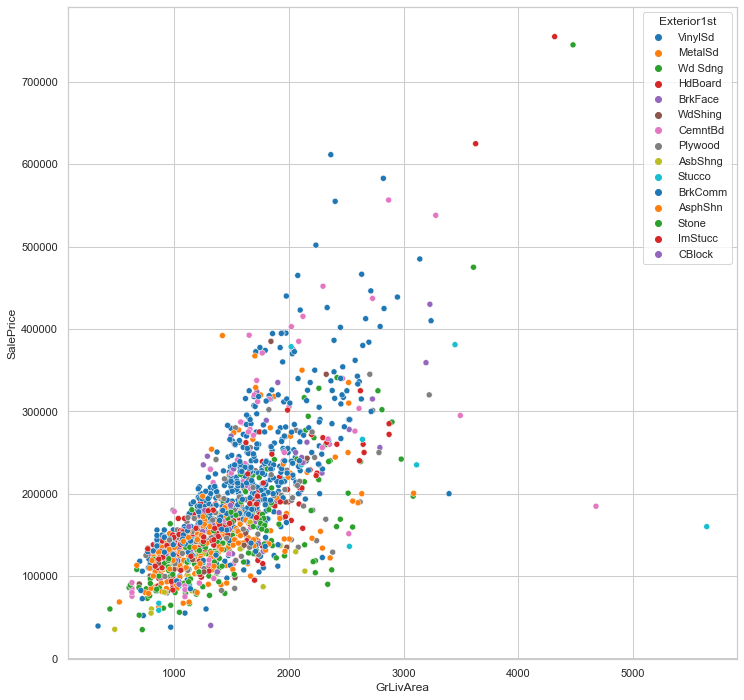

In [29]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Exterior1st,palette="tab10")
plt.show()

Se descarta

25. Exterior2nd: categórica nominal. Igual a la anterior

26. MasVnrType: categórica nominal

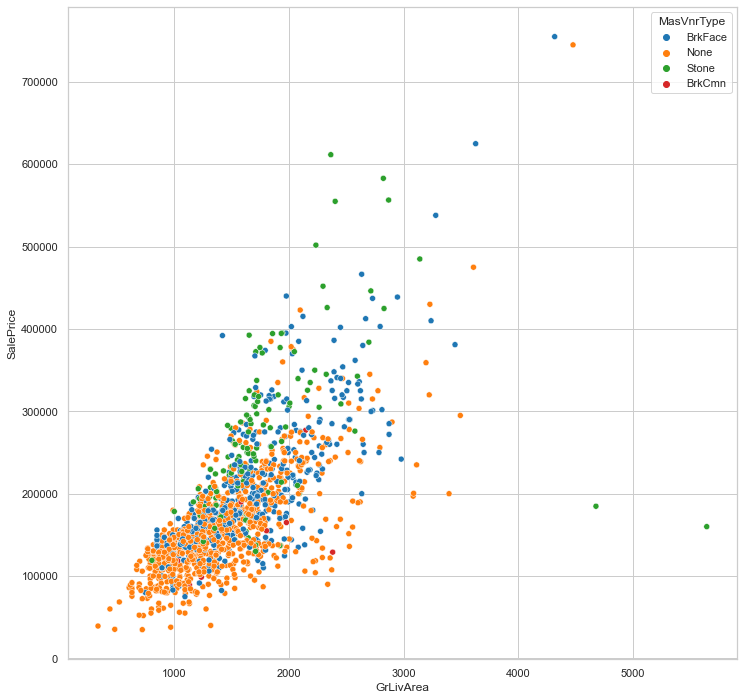

In [30]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.MasVnrType,palette="tab10")
plt.show()

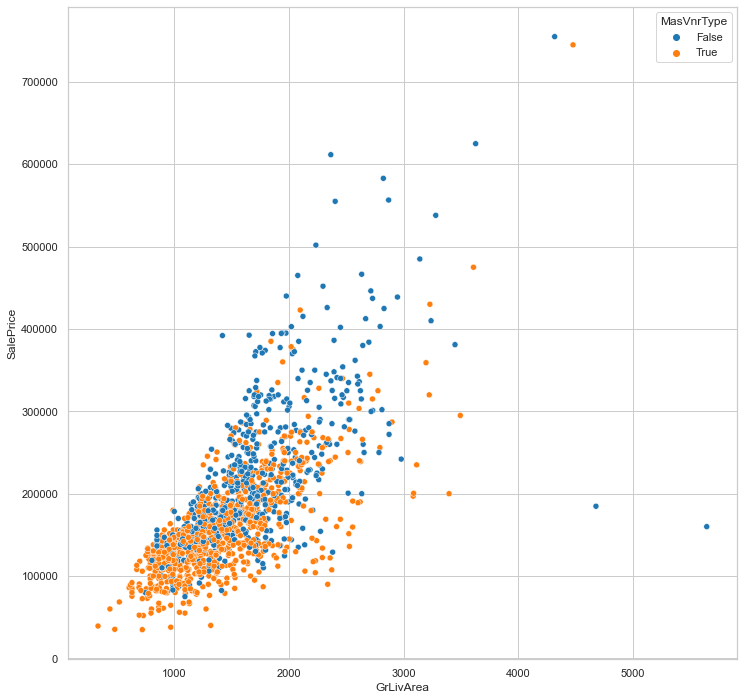

In [32]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=(df.MasVnrType == 'None'),palette="tab10")
plt.show()

Más allá del tipo, la presencia está más relacionada con el precio. Se mantiene pero se transforma a binaria

27. MasVnrArea: variable numérica

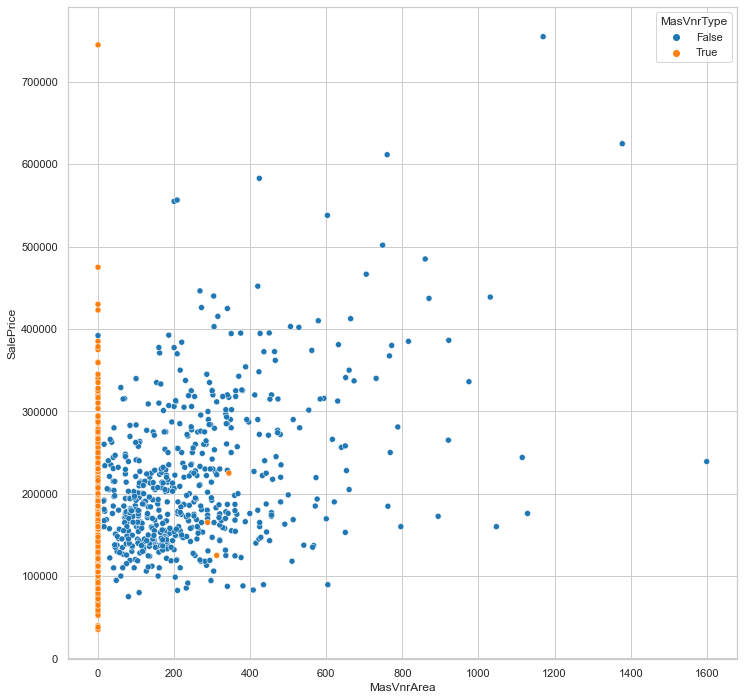

In [35]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.MasVnrArea, y=df.SalePrice,hue=(df.MasVnrType == 'None'),palette="tab10")
plt.show()

Se mantiene

28. ExterQual: categórica ordinal

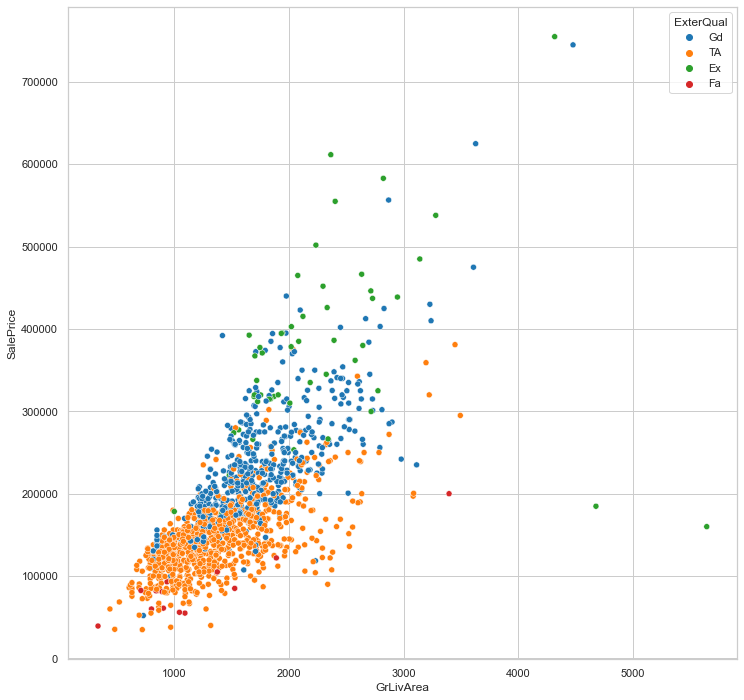

In [36]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.ExterQual,palette="tab10")
plt.show()

Se mantiene, pero se debe numerar

29. ExterCond: categórica ordinal

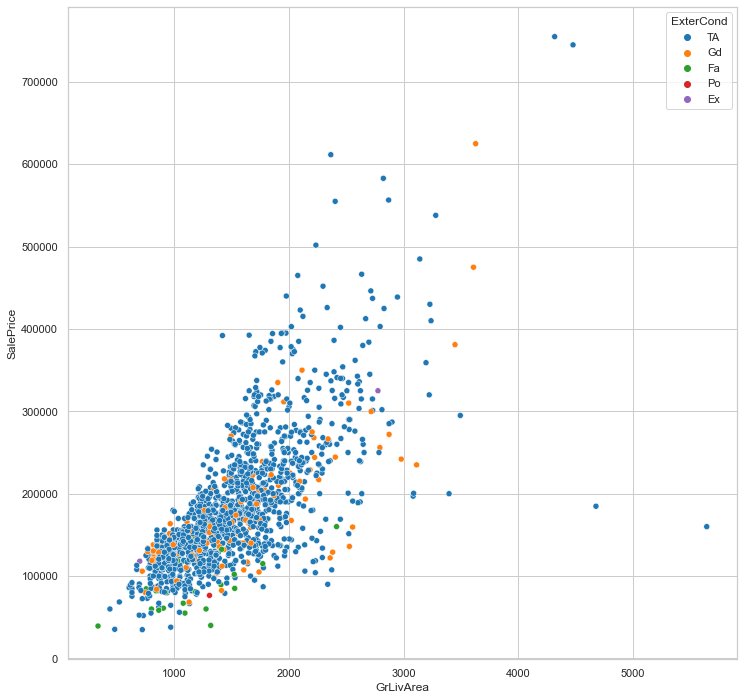

In [37]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.ExterCond,palette="tab10")
plt.show()

Sí parece influir, pero se tiene la categoría anterior, así que se descarta 

30. Foundation: categórica nominal

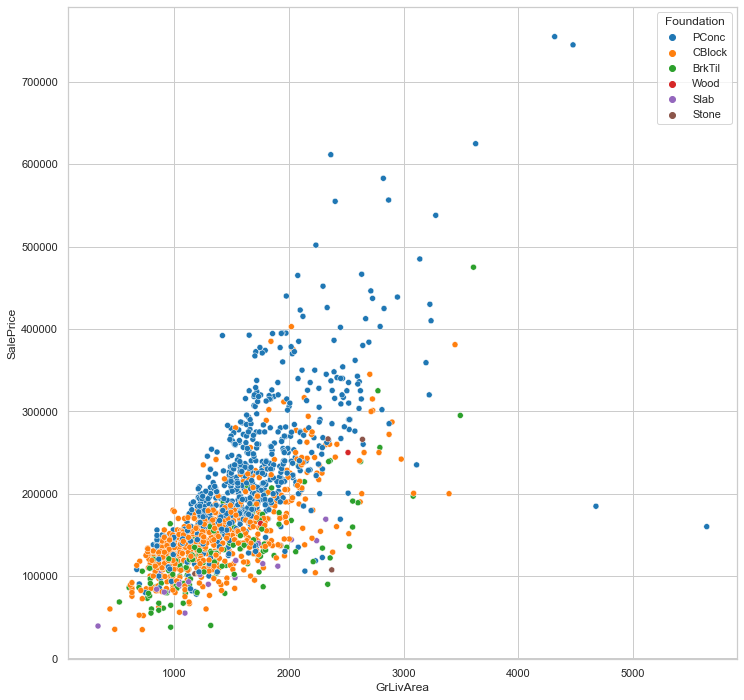

In [38]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Foundation,palette="tab10")
plt.show()

Se mantiene

31. BsmtQual: categórica ordinal

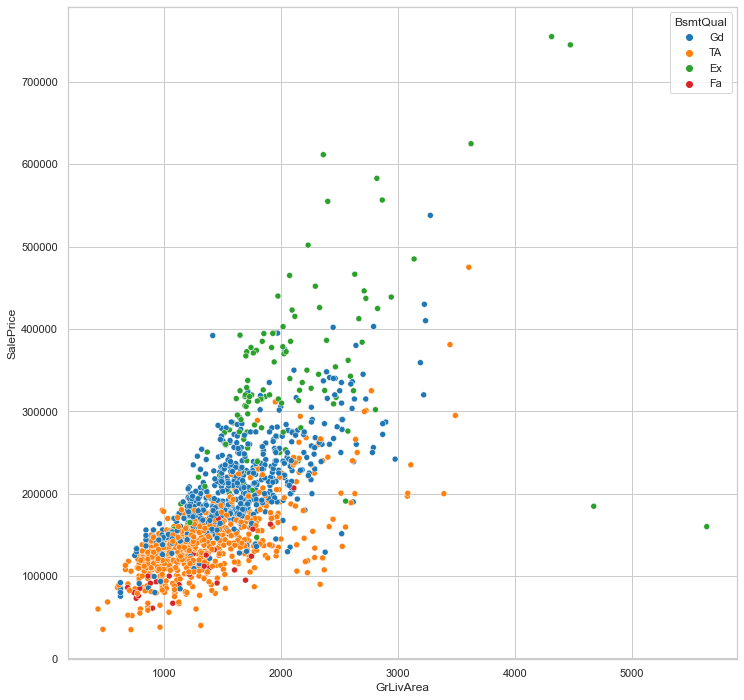

In [39]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.BsmtQual,palette="tab10")
plt.show()

Se mantiene, pero se debe numerar

32. BsmtCond: categórica ordinal

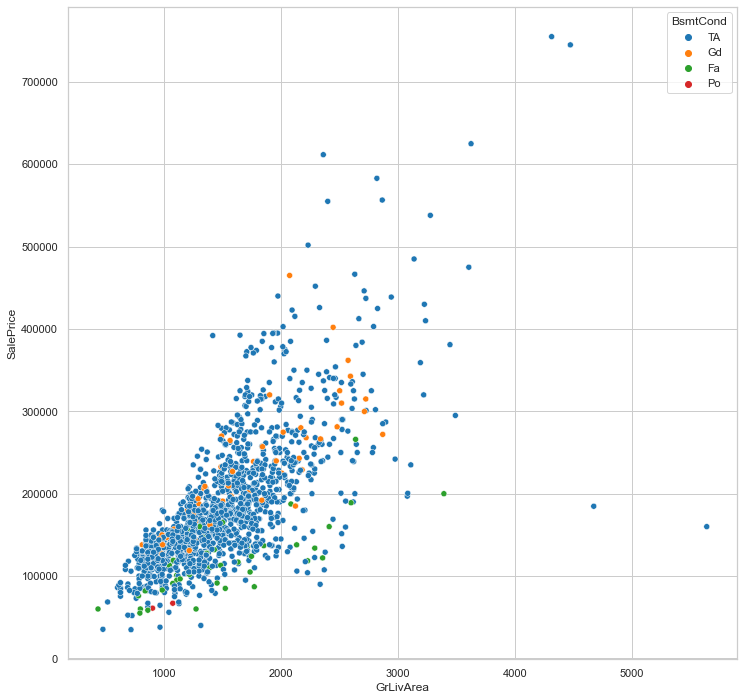

In [40]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.BsmtCond,palette="tab10")
plt.show()

Se tiene la variable anterior, así que esta se descarta

33. BsmtExposure: categórica ordinal

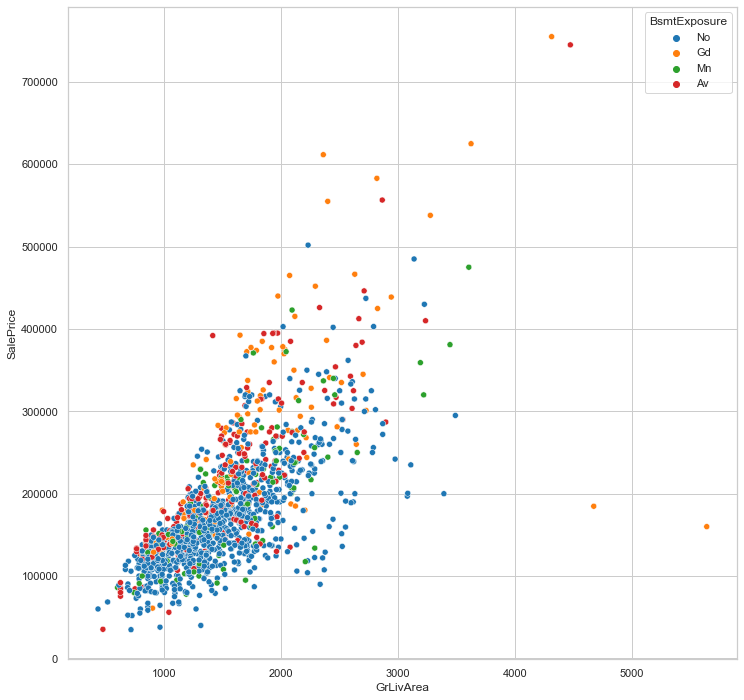

In [41]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.BsmtExposure,palette="tab10")
plt.show()

Se mantiene pero se debe numerar

34. BsmtFinType1: categórica nominal/ordinal

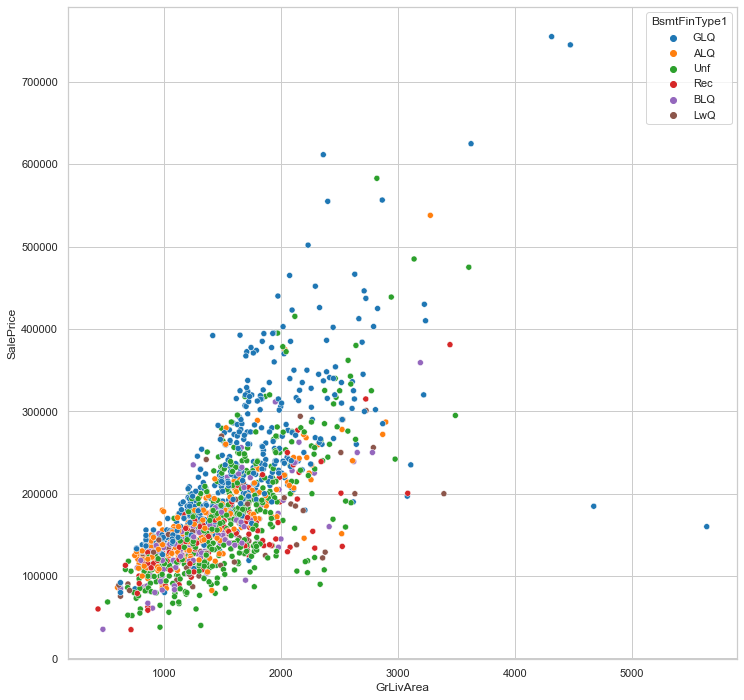

In [42]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.BsmtFinType1,palette="tab10")
plt.show()

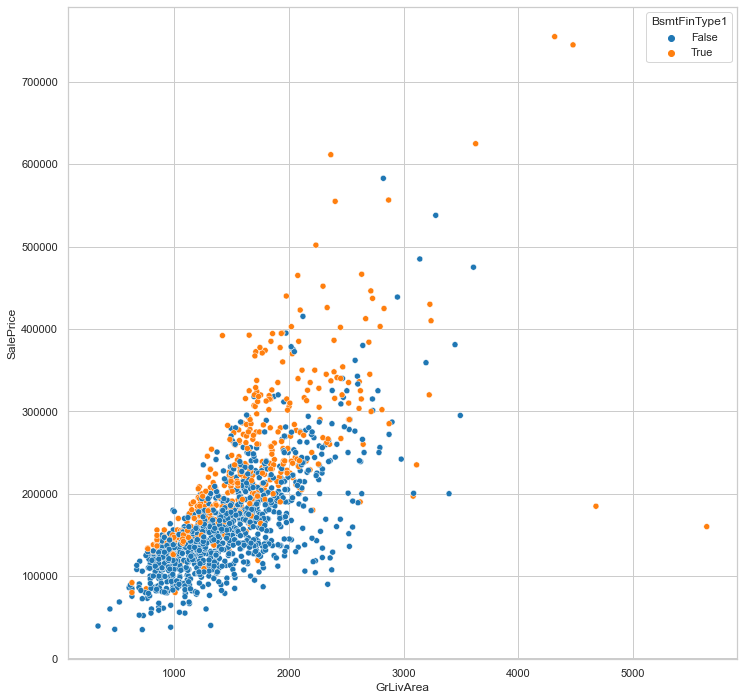

In [48]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=(df.BsmtFinType1 == 'GLQ'),palette="tab10")
plt.show()

Se mantiene, pero se pasa a binaria

35. BsmtFinSF1: numérica

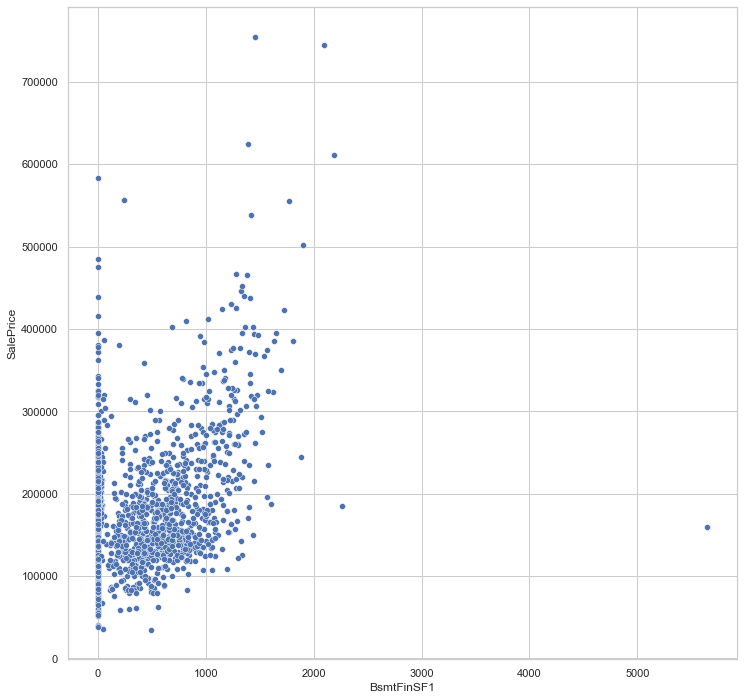

In [49]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.BsmtFinSF1, y=df.SalePrice,palette="tab10")
plt.show()

Se mantiene

36. BsmtFinType2: categórica nominal/ordinal

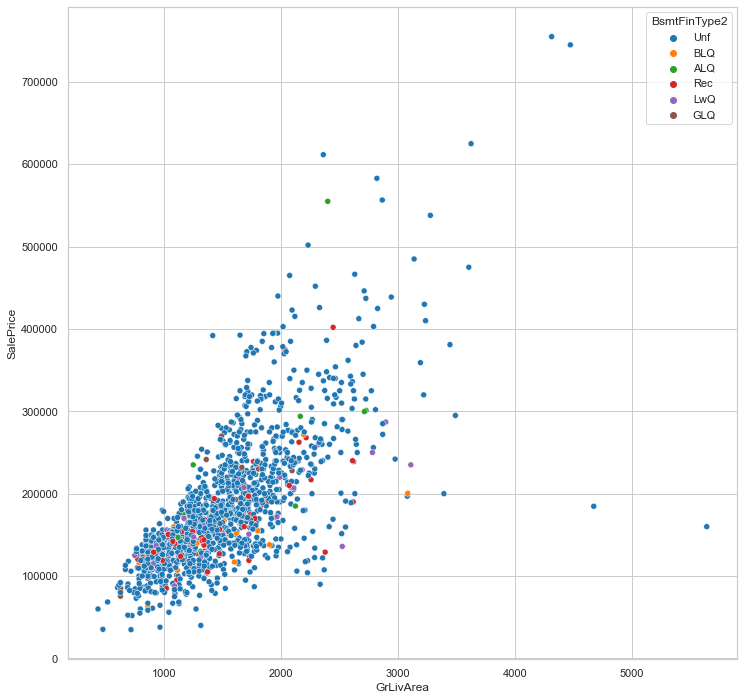

In [50]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.BsmtFinType2,palette="tab10")
plt.show()

Se descarta

37. BsmtFinSF2: numérica

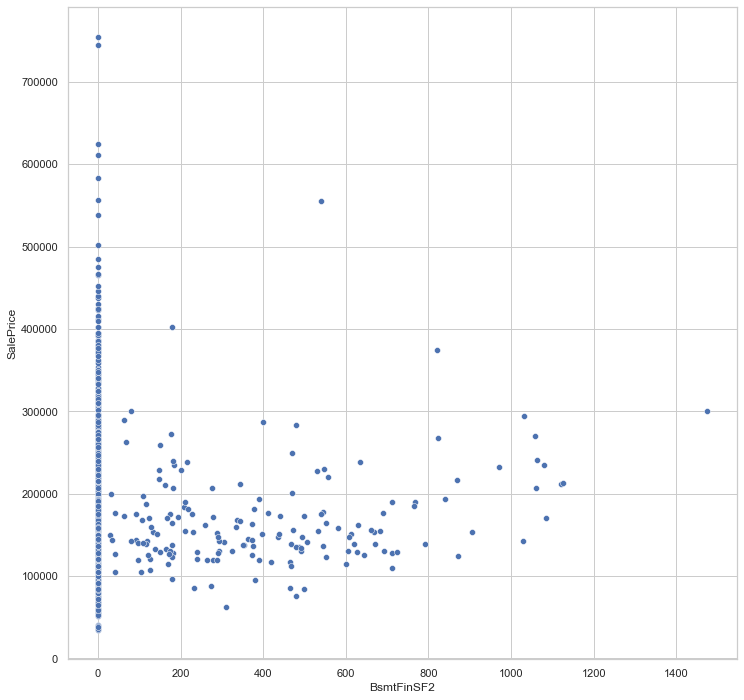

In [51]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.BsmtFinSF2, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

38. BsmtUnfSF: numérica

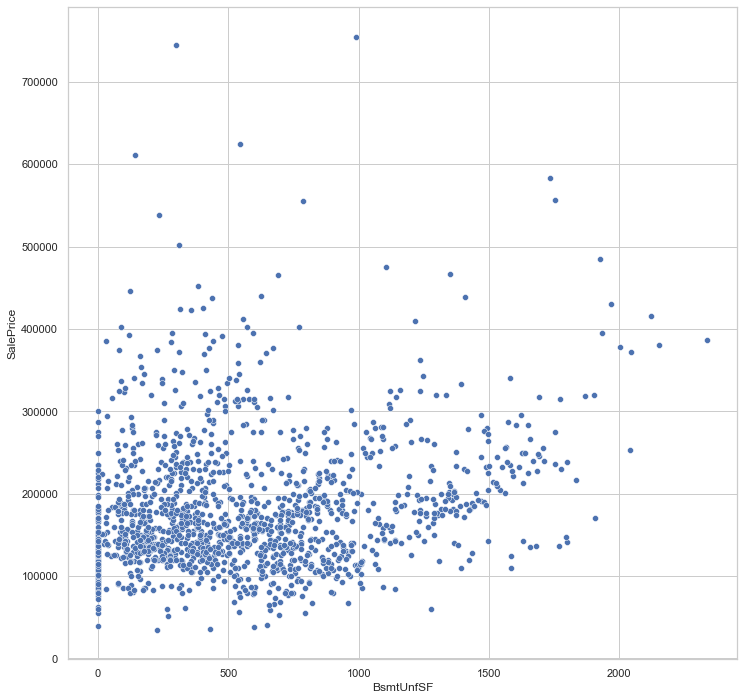

In [52]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.BsmtUnfSF, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

39. TotalBsmtSF: numérica

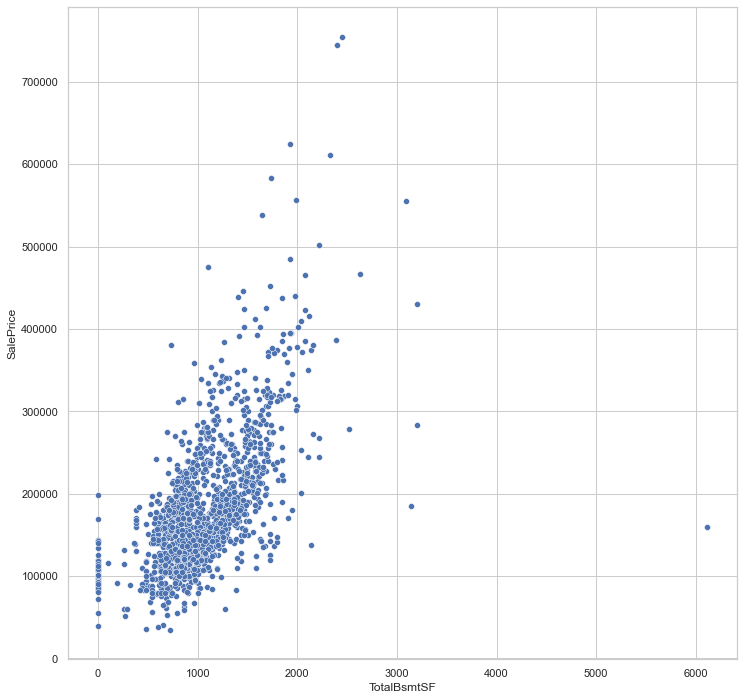

In [53]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.TotalBsmtSF, y=df.SalePrice,palette="tab10")
plt.show()

Se mantiene

40. Heating: categórica nominal

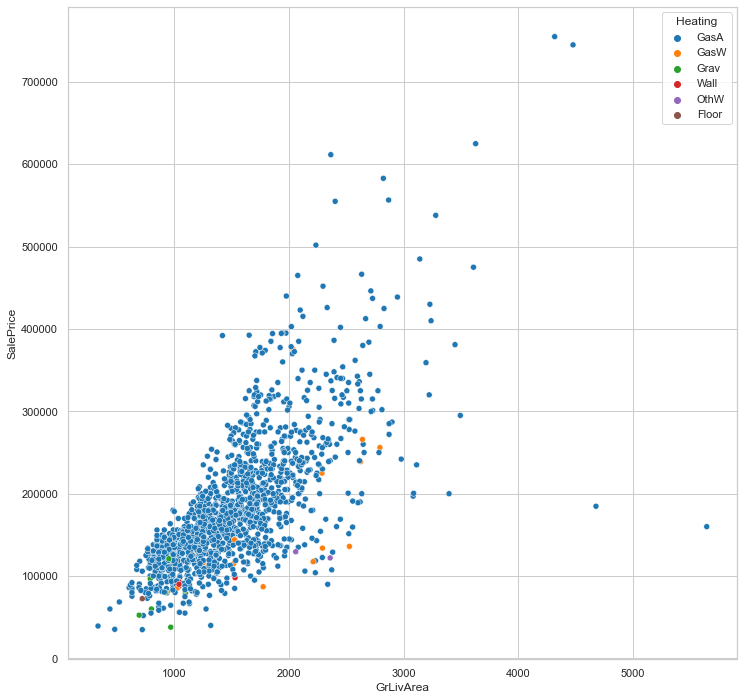

In [54]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Heating,palette="tab10")
plt.show()

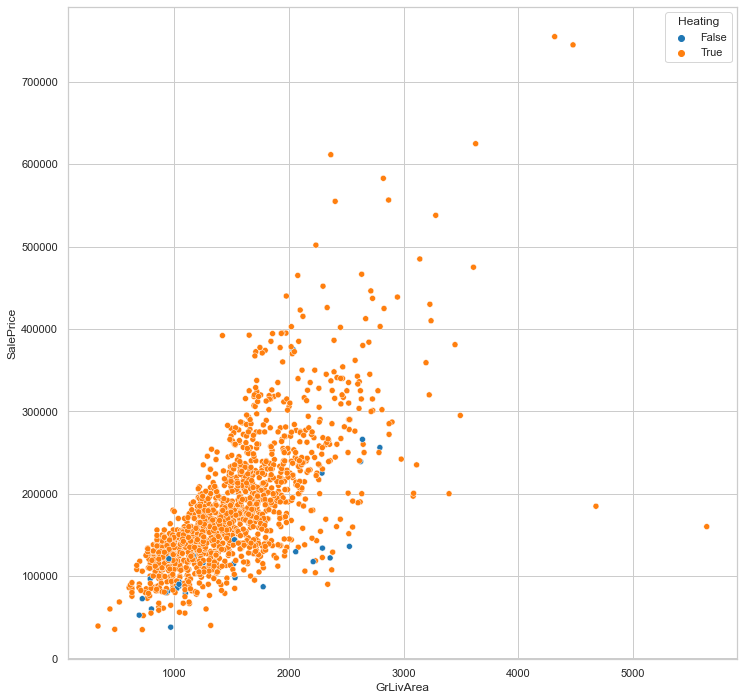

In [55]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Heating == 'GasA',palette="tab10")
plt.show()

Se mantiene pero se cambia a binaria

41. HeatingQC: categórica ordinal

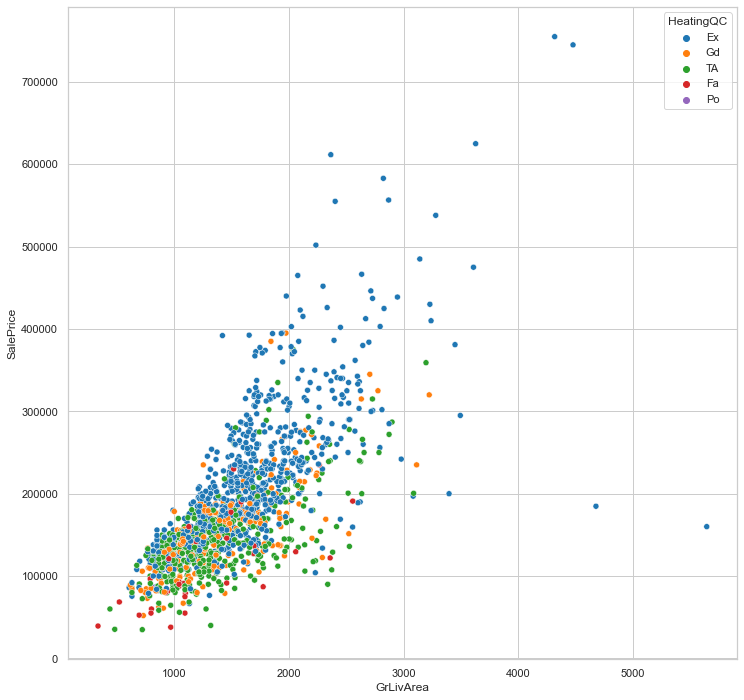

In [56]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.HeatingQC,palette="tab10")
plt.show()

Se mantiene pero se debe numerar

42. CentralAir: categórica nominal

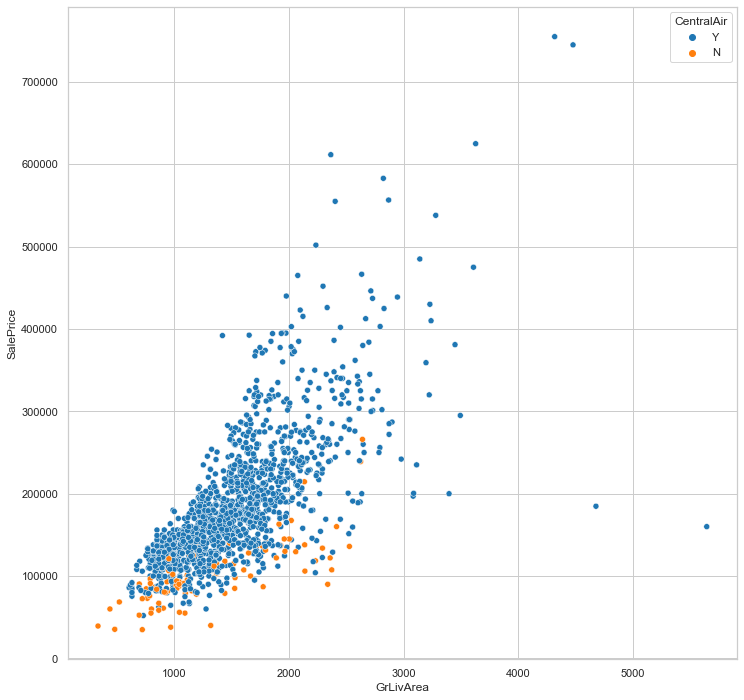

In [57]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.CentralAir,palette="tab10")
plt.show()

Se mantiene pero se cambia a binaria

43. Electrical: categórica nominal

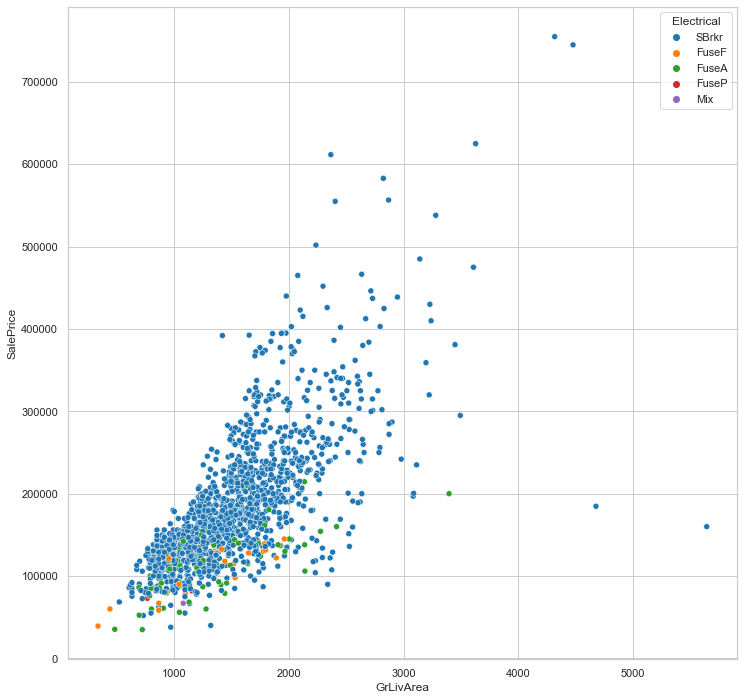

In [58]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Electrical,palette="tab10")
plt.show()

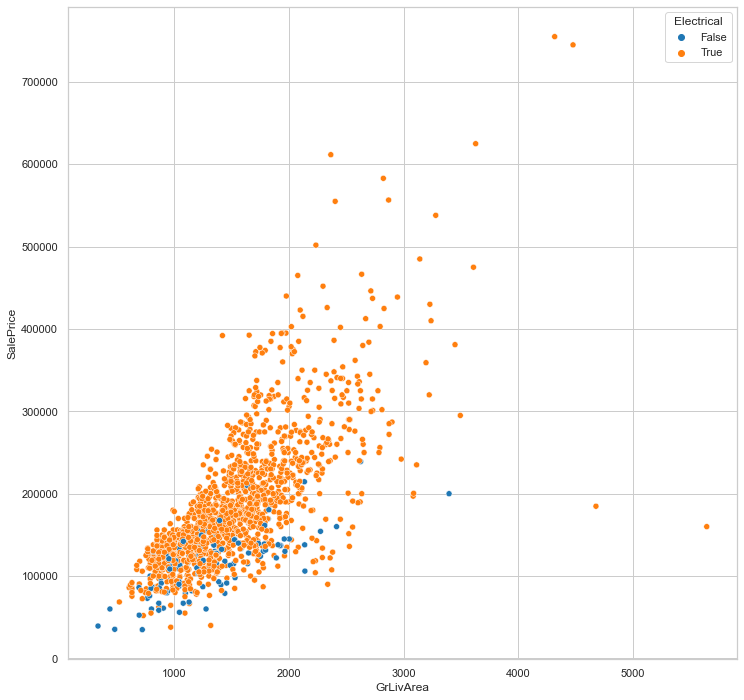

In [59]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Electrical == 'SBrkr',palette="tab10")
plt.show()

Se mantiene pero se cambia a binaria

44. 1stFlrSF: numérica

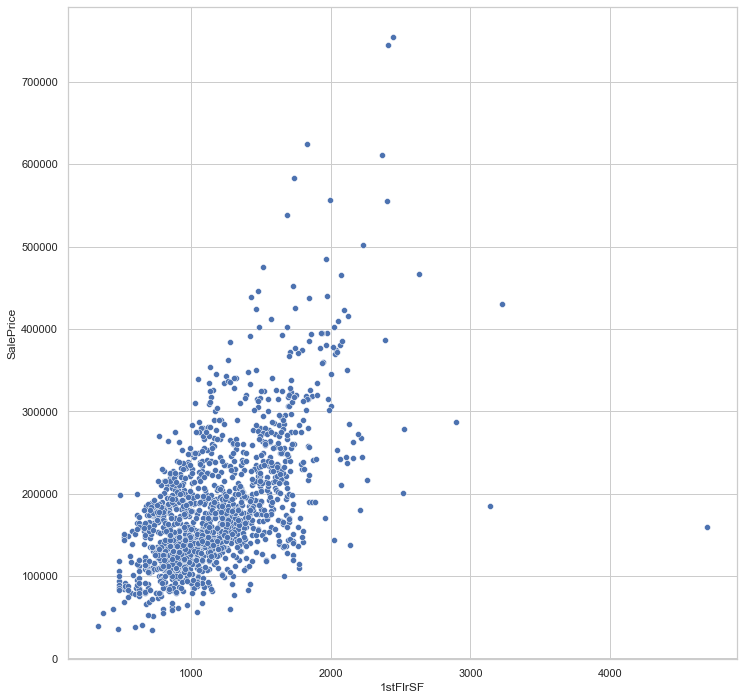

In [61]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df['1stFlrSF'], y=df.SalePrice,palette="tab10")
plt.show()

Si bien hay relación, se descarta debido a que existe la variable GrLivArea que agrega esta información

45. 2ndFlrSF

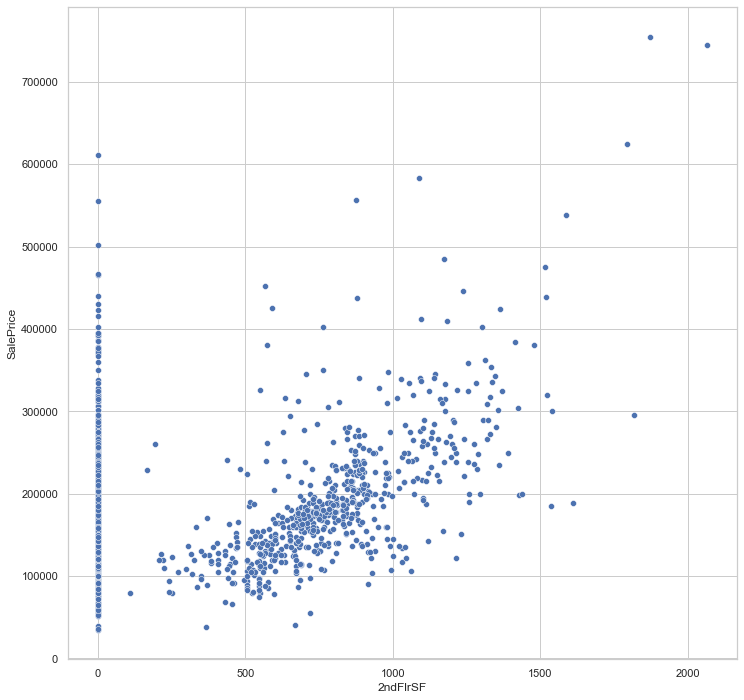

In [62]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df['2ndFlrSF'], y=df.SalePrice,palette="tab10")
plt.show()

Si bien hay relación, se descarta debido a que existe la variable GrLivArea que agrega esta información

46. LowQualFinSF: numérica

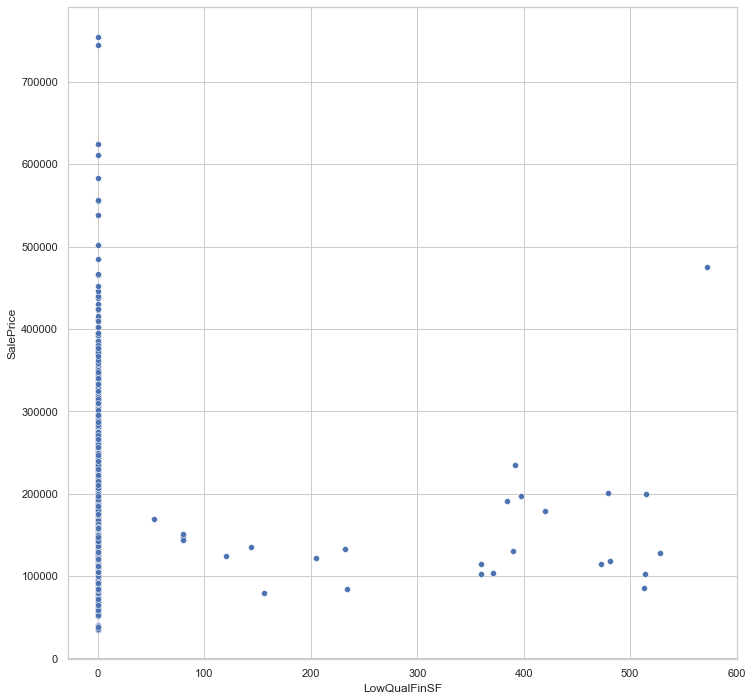

In [112]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.LowQualFinSF, y=df.SalePrice,palette="tab10")
plt.show()

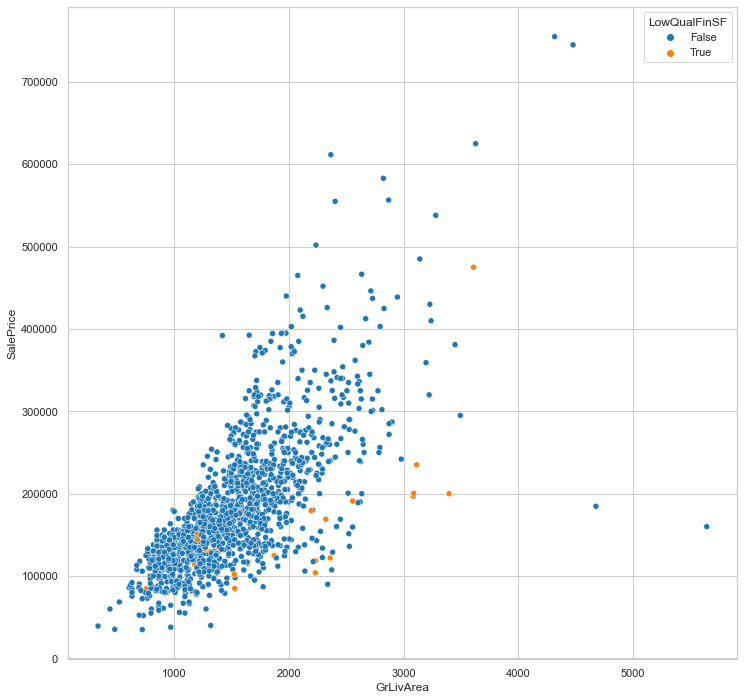

In [114]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.LowQualFinSF > 0, palette="tab10")
plt.show()

Se descarta

47. GrLivArea: numérica. Se mantiene

48. BsmtFullBath: numérica

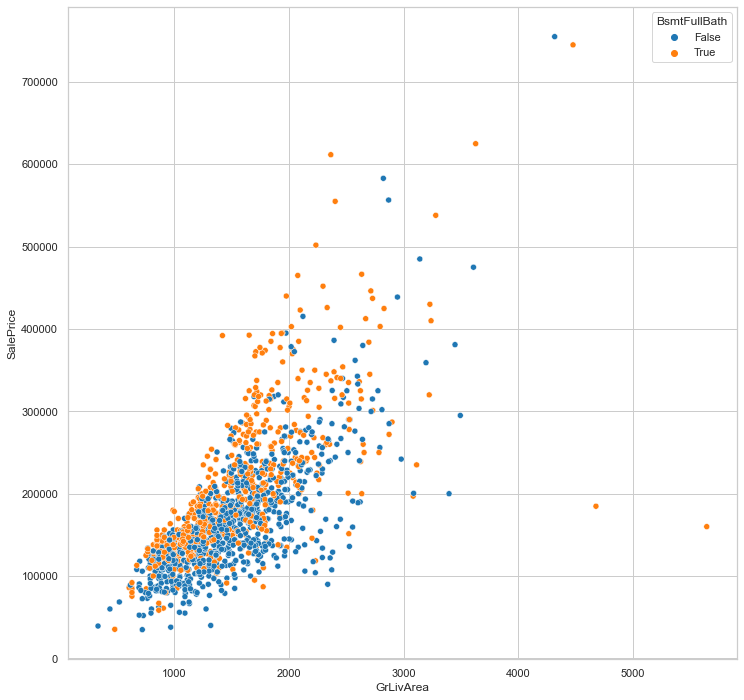

In [64]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.BsmtFullBath > 0,palette="tab10")
plt.show()

Se mantiene pero se cambia a binaria

49. BsmtHalfBath: numérica

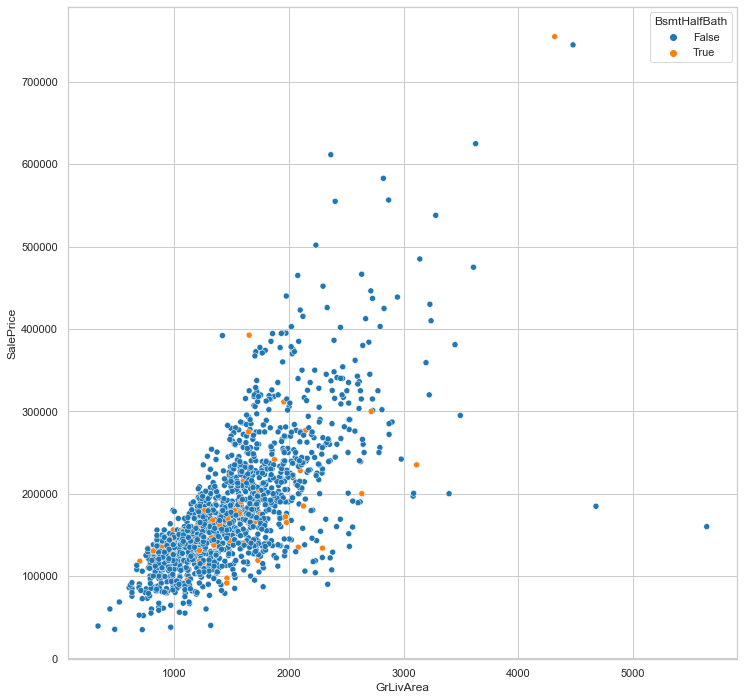

In [66]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.BsmtHalfBath > 0,palette="tab10")
plt.show()

Se descarta

50. FullBath: numérica

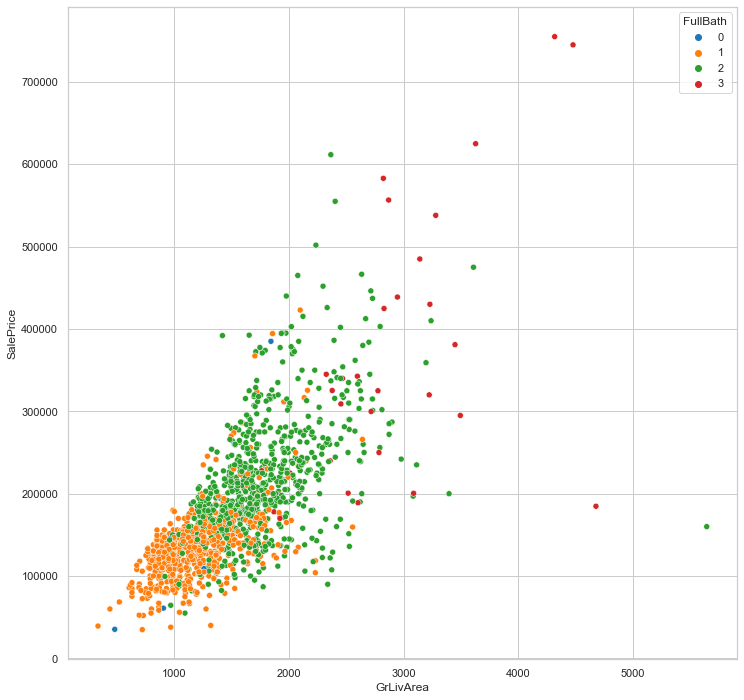

In [67]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.FullBath,palette="tab10")
plt.show()

Se descarta. El área habitable prepondera

51. HalfBath: numérica

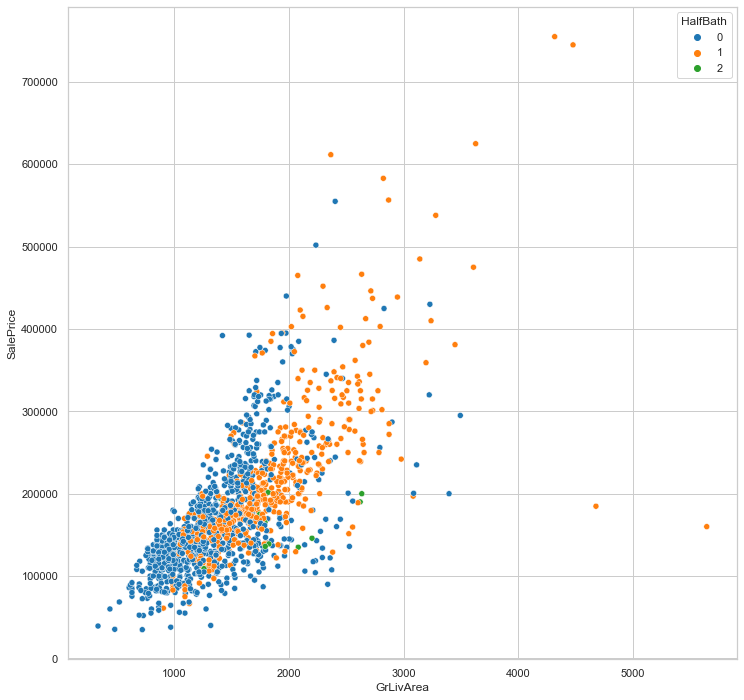

In [69]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.HalfBath,palette="tab10")
plt.show()

Se descarta

52. BedroomAbvGr: numérica

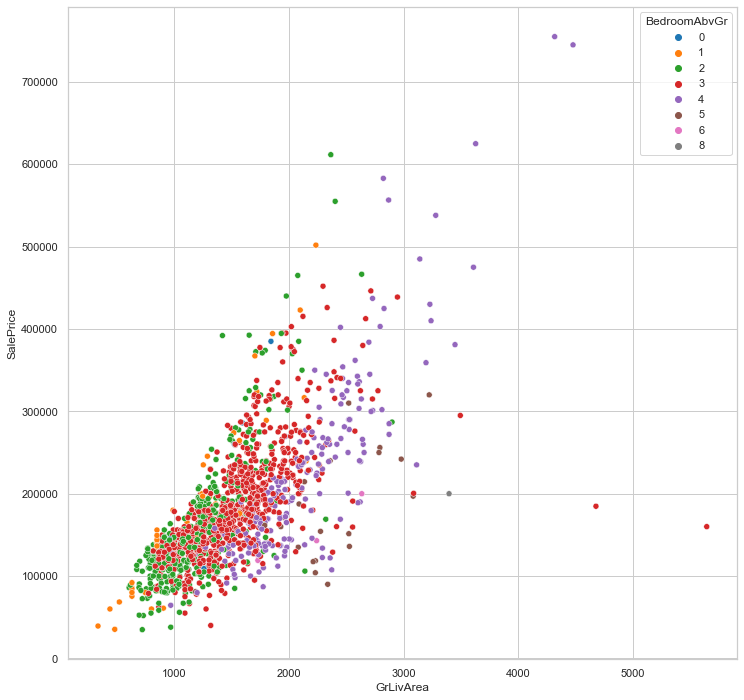

In [70]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.BedroomAbvGr,palette="tab10")
plt.show()

Se descarta. El área habitable prepondera

53. KitchenAbvGr: numérica

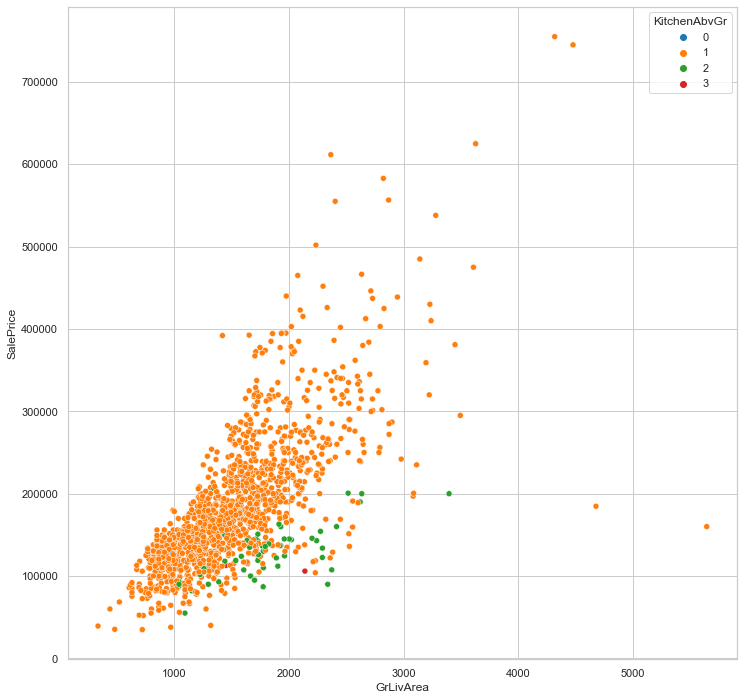

In [71]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.KitchenAbvGr,palette="tab10")
plt.show()

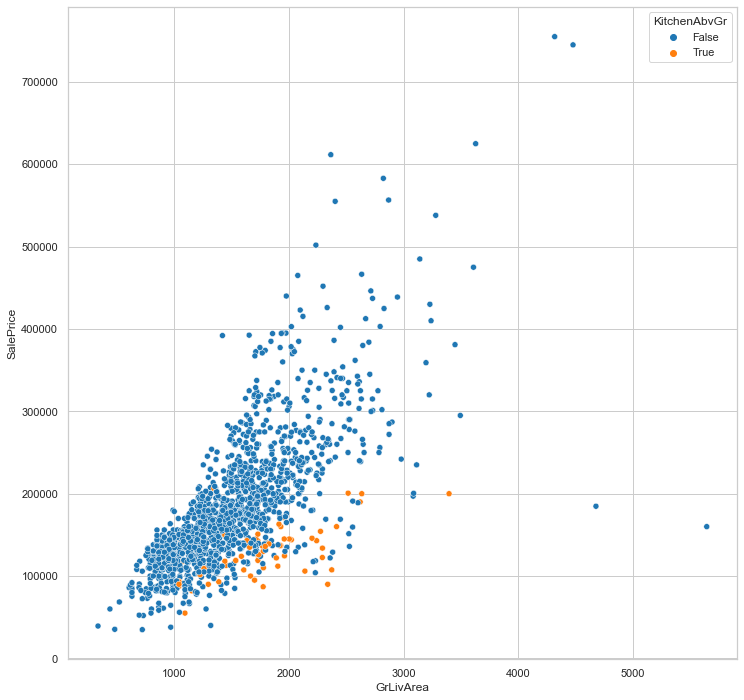

In [73]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.KitchenAbvGr>1,palette="tab10")
plt.show()

Se mantiene pero se cambia a binaria

54. KitchenQual: categórica ordinal

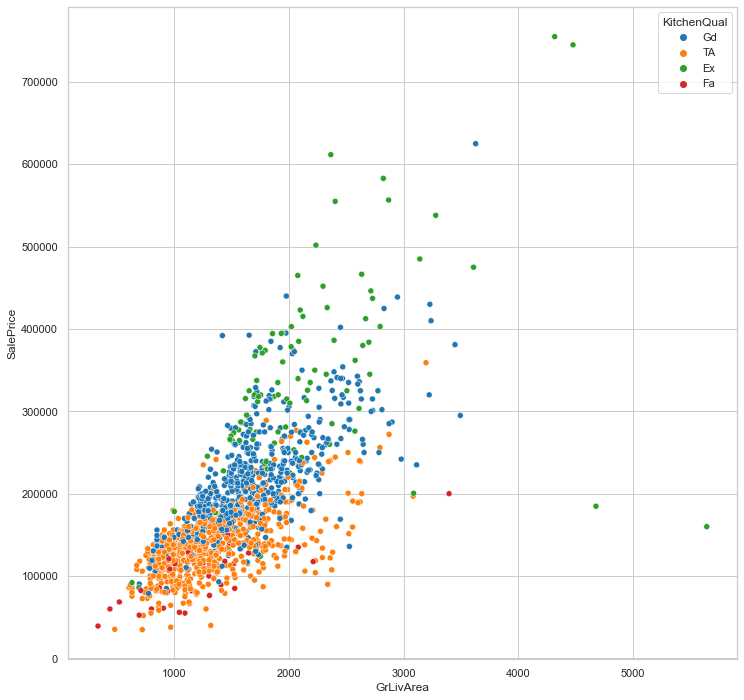

In [74]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.KitchenQual,palette="tab10")
plt.show()

Se mantiene pero se debe numerar

55. TotRmsAbvGrd: numérica

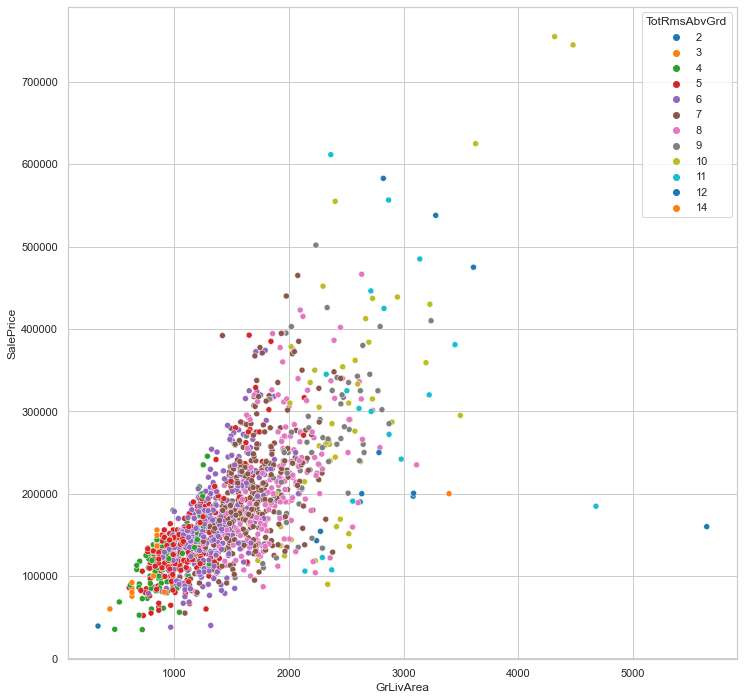

In [76]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.TotRmsAbvGrd,palette="tab10")
plt.show()

Se descarta, prepondera el área habitable

56. Functional: categórica nominal

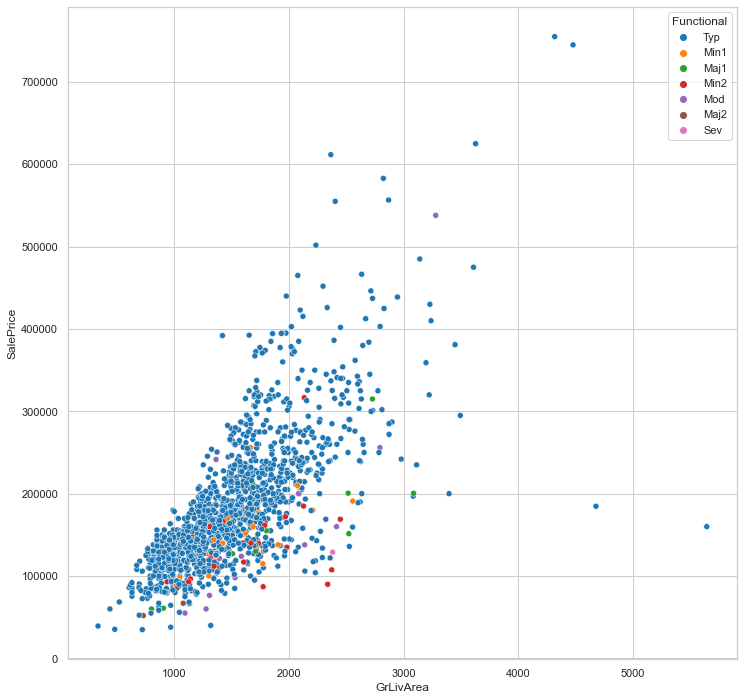

In [77]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Functional,palette="tab10")
plt.show()

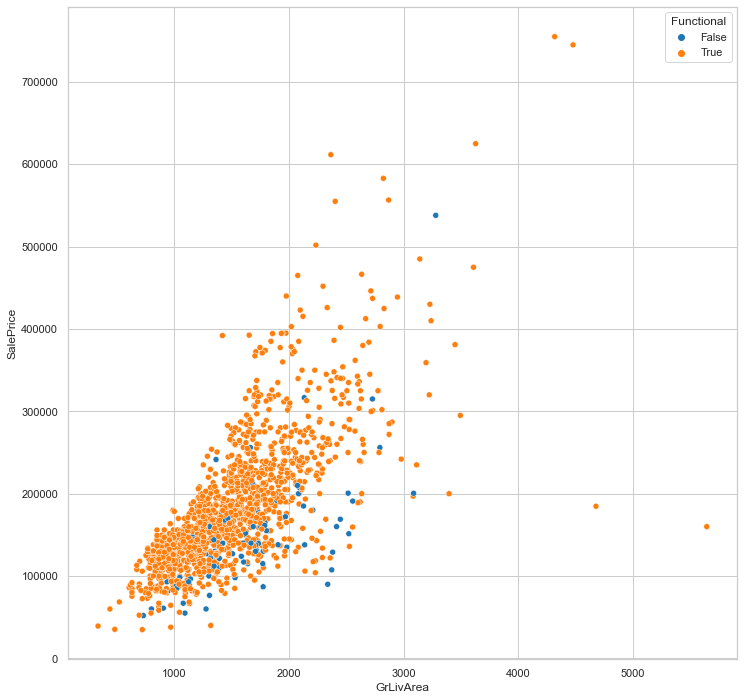

In [78]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Functional == 'Typ',palette="tab10")
plt.show()

Se mantiene pero se cambia a binaria

57. Fireplaces: numérica

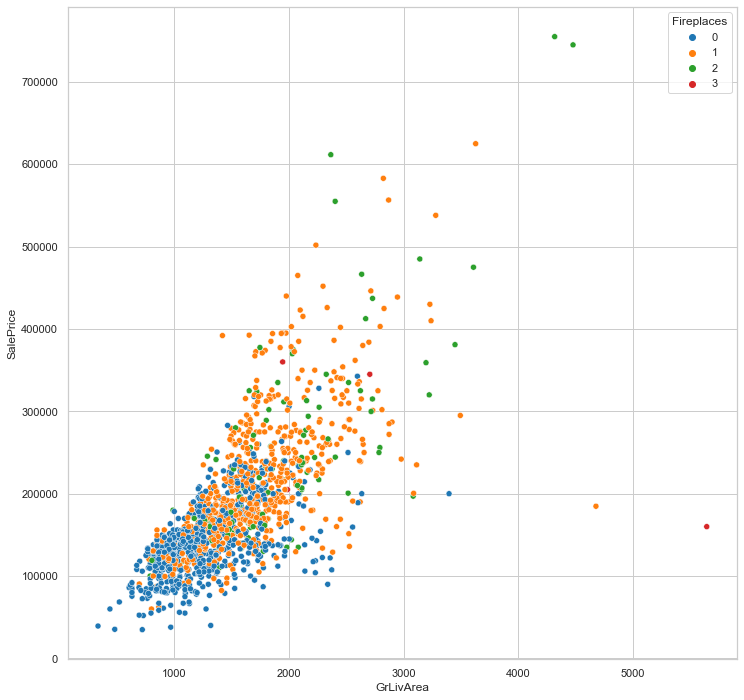

In [79]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Fireplaces,palette="tab10")
plt.show()

Se descarta, prepondera el área habitable

58. FireplaceQu: categórica ordinal

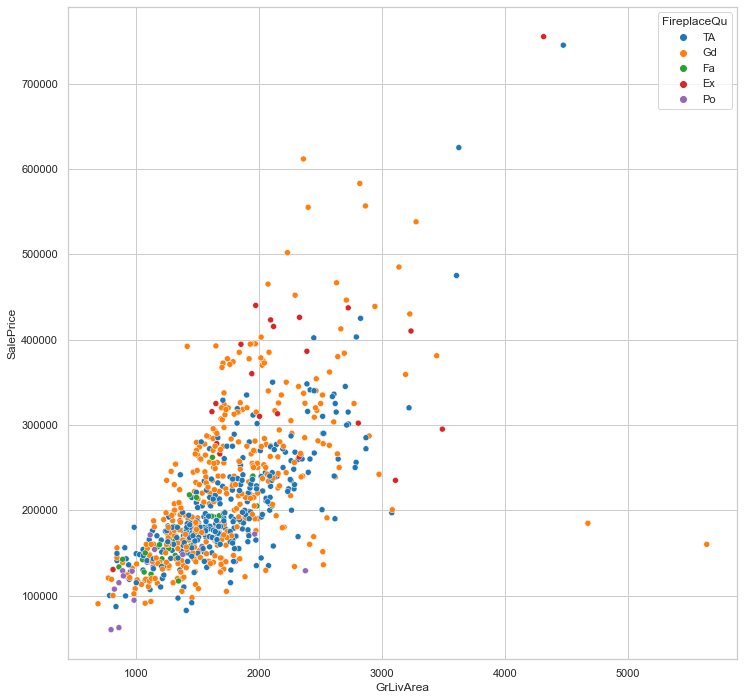

In [80]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.FireplaceQu,palette="tab10")
plt.show()

Se descarta

59. GarageType: categórica nominal

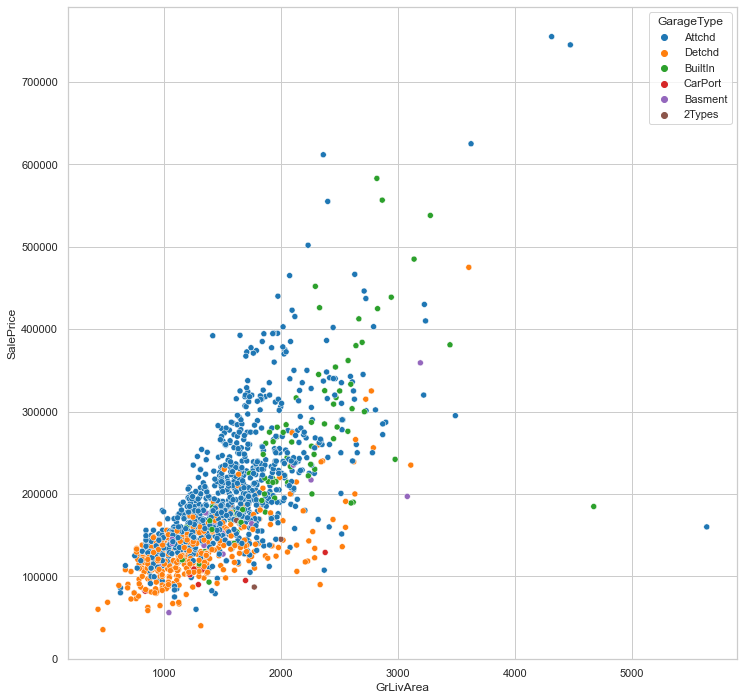

In [81]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.GarageType,palette="tab10")
plt.show()

Se mantiene, pero se debe transformar

60. GarageYrBlt: numérica

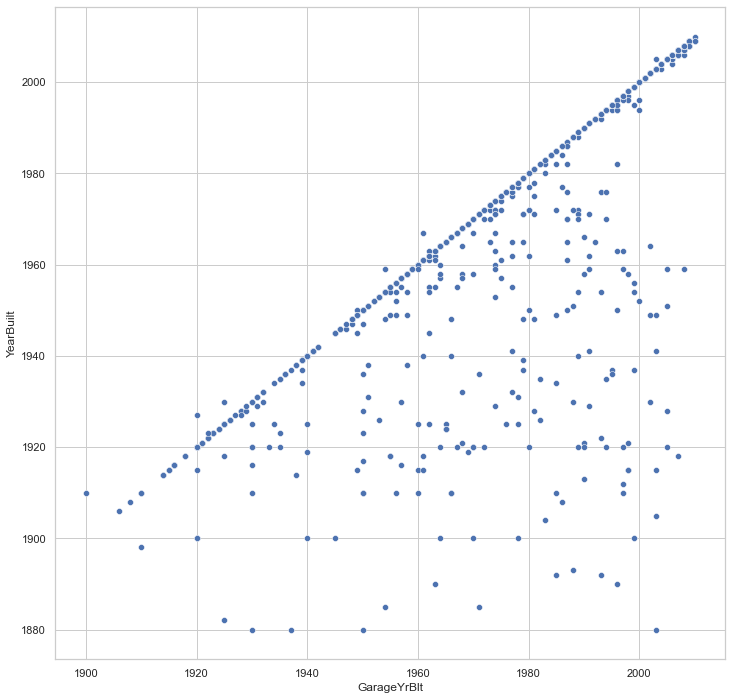

In [83]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GarageYrBlt, y=df.YearBuilt,palette="tab10")
plt.show()

Se descarta, año de construcción tiene preponderancia

61. GarageFinish: categórica ordinal

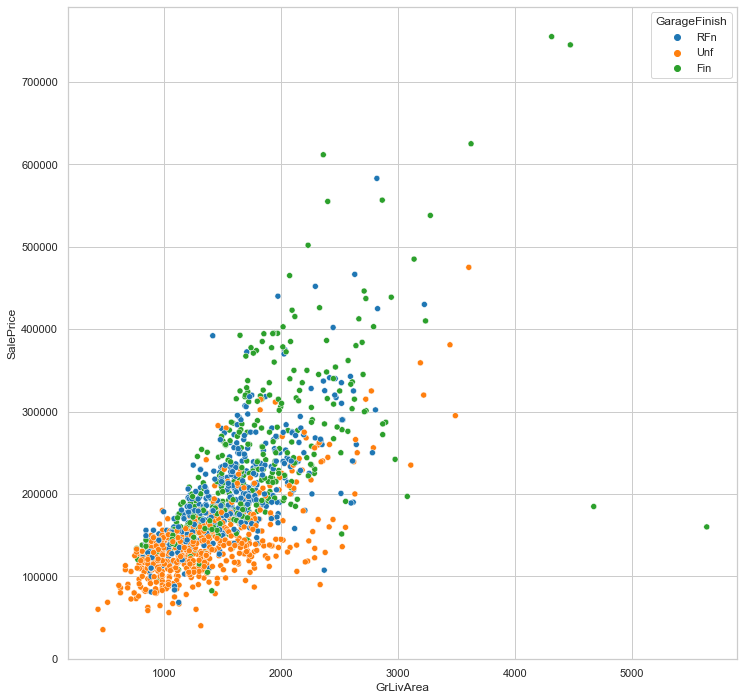

In [84]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.GarageFinish,palette="tab10")
plt.show()

Se mantiene, pero se debe numerar

62. GarageCars: numérica

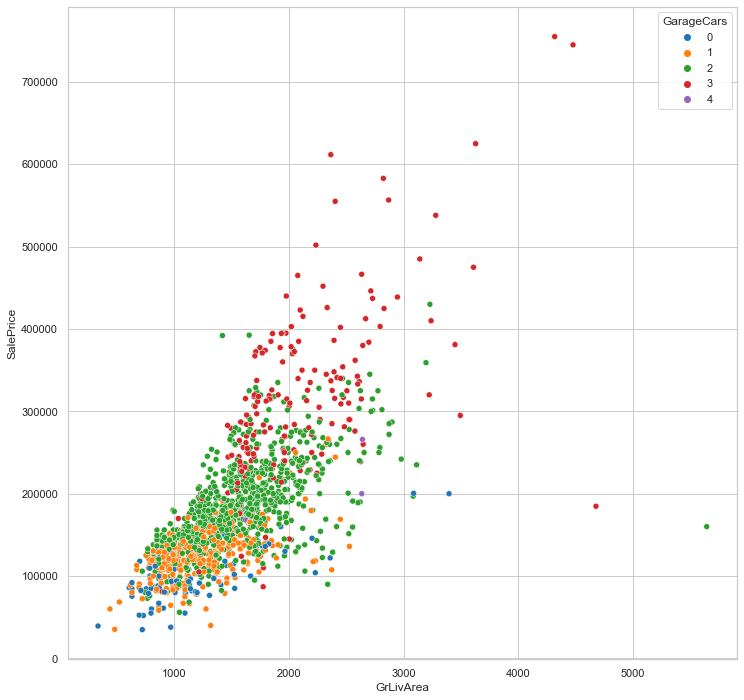

In [85]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.GarageCars,palette="tab10")
plt.show()

Se mantiene

63. GarageArea: numérica

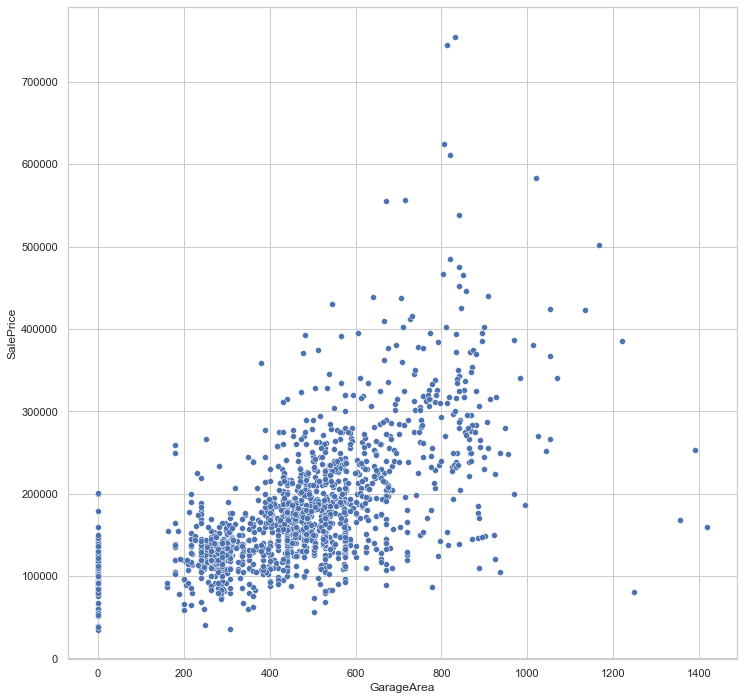

In [87]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GarageArea, y=df.SalePrice,palette="tab10")
plt.show()

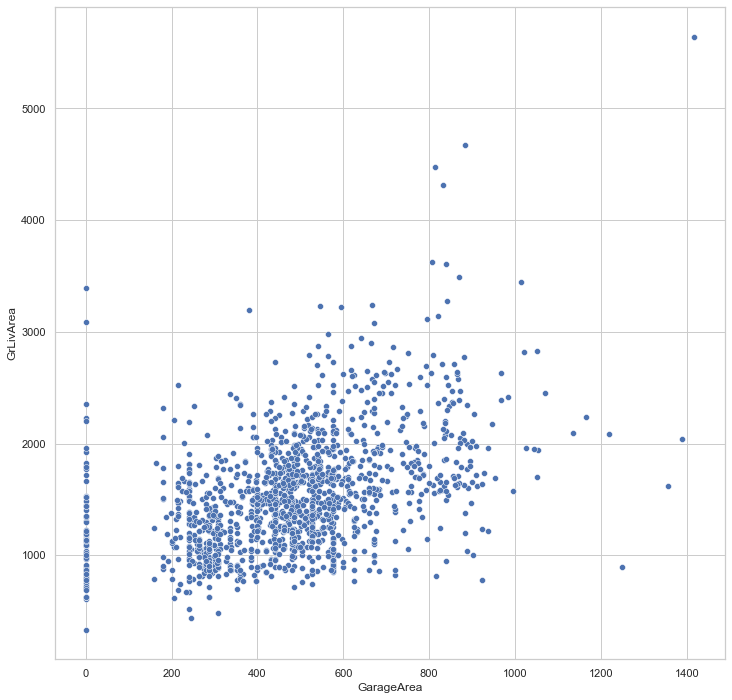

In [88]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GarageArea, y=df.GrLivArea,palette="tab10")
plt.show()

Se descarta

64. GarageQual: categórica ordinal

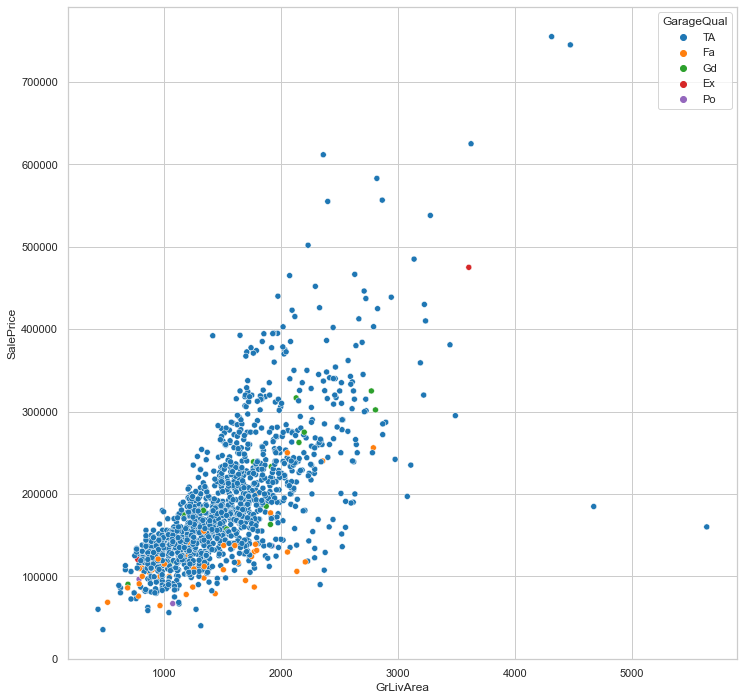

In [89]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.GarageQual,palette="tab10")
plt.show()

Se mantiene pero se debe numerar

65. GarageCond: categórica nominal

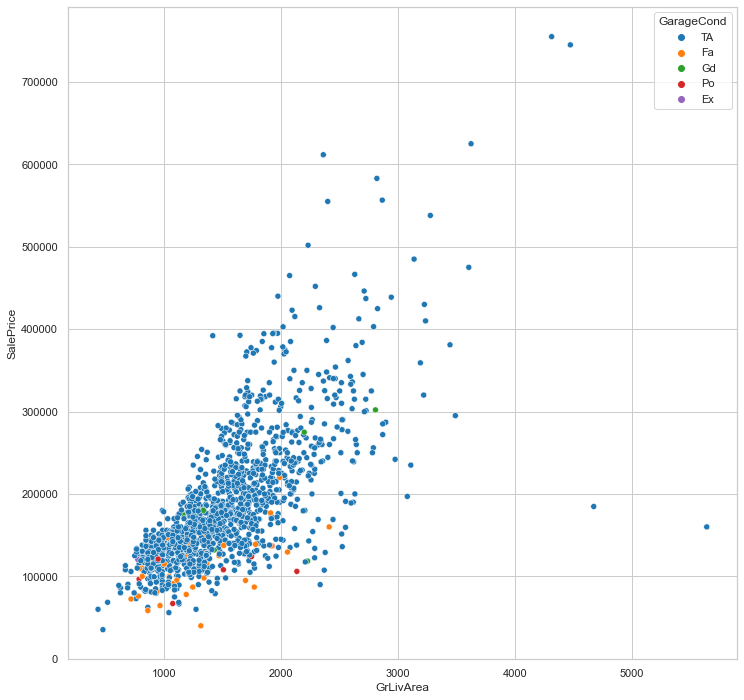

In [90]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.GarageCond,palette="tab10")
plt.show()

Se descarta, se asume la variable anterior

66. PavedDrive: categórica nominal

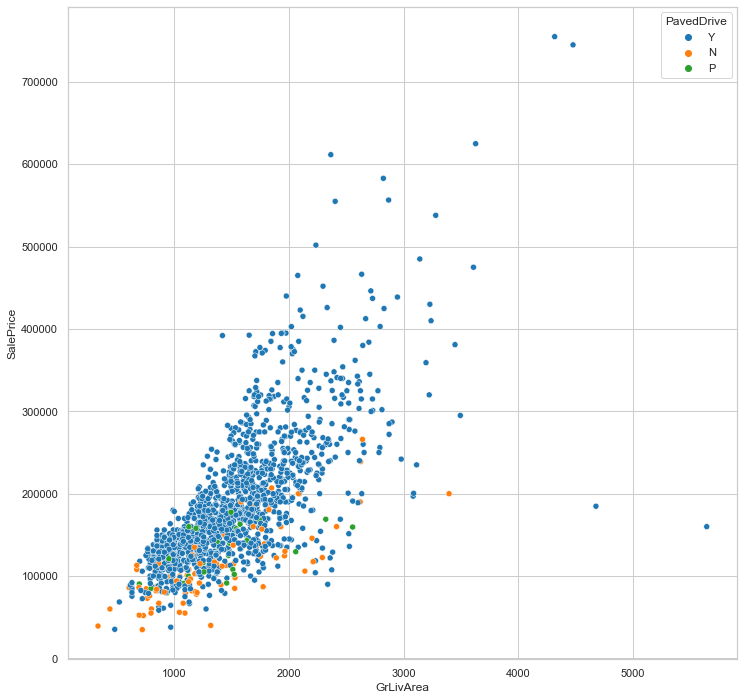

In [91]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.PavedDrive,palette="tab10")
plt.show()

Se mantiene pero se debe transformar

67. WoodDeckSF: numérica

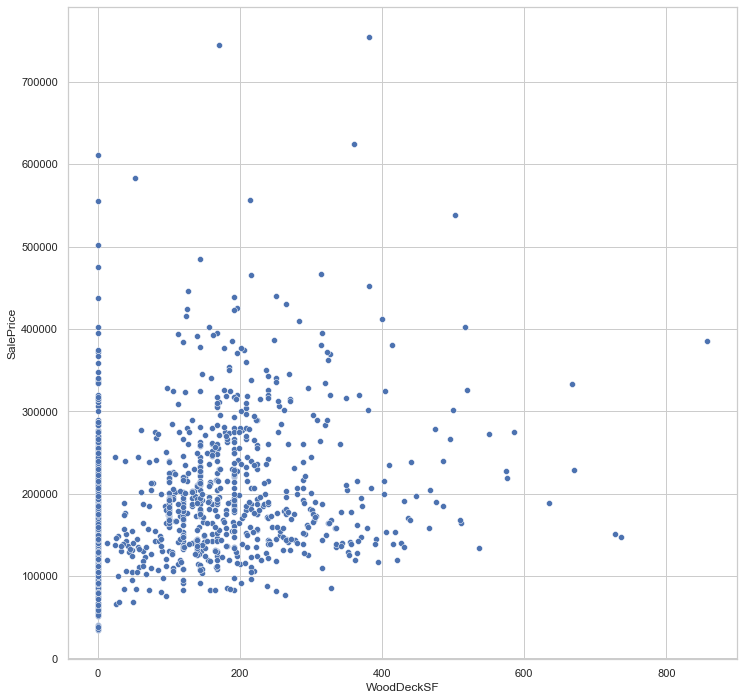

In [92]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.WoodDeckSF, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

68. OpenPorchSF: numérica

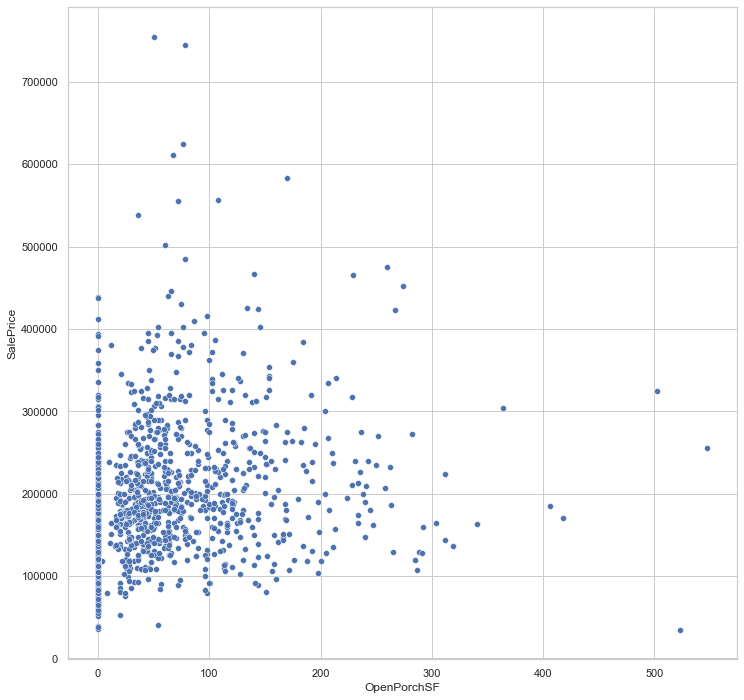

In [93]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.OpenPorchSF, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

69. EnclosedPorch: numérica

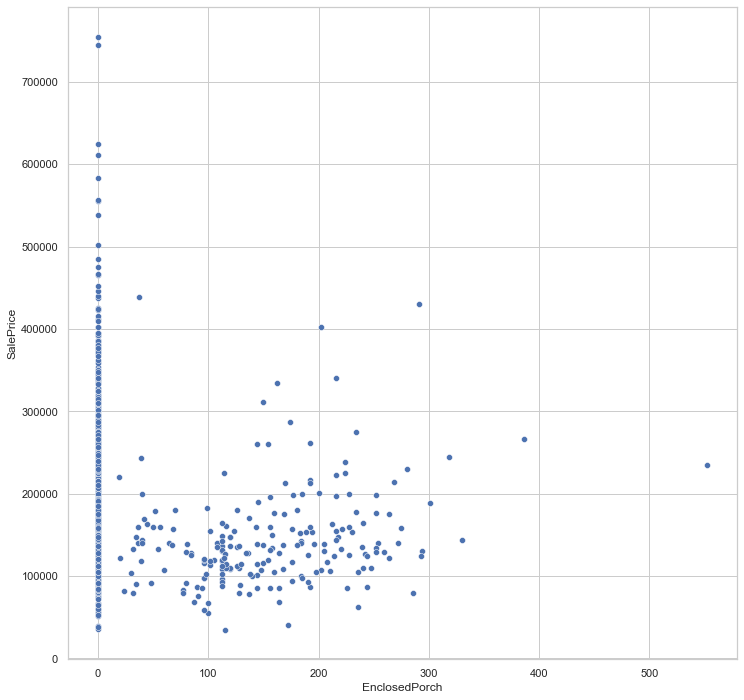

In [94]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.EnclosedPorch, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

70. 3SsnPorch: numérica

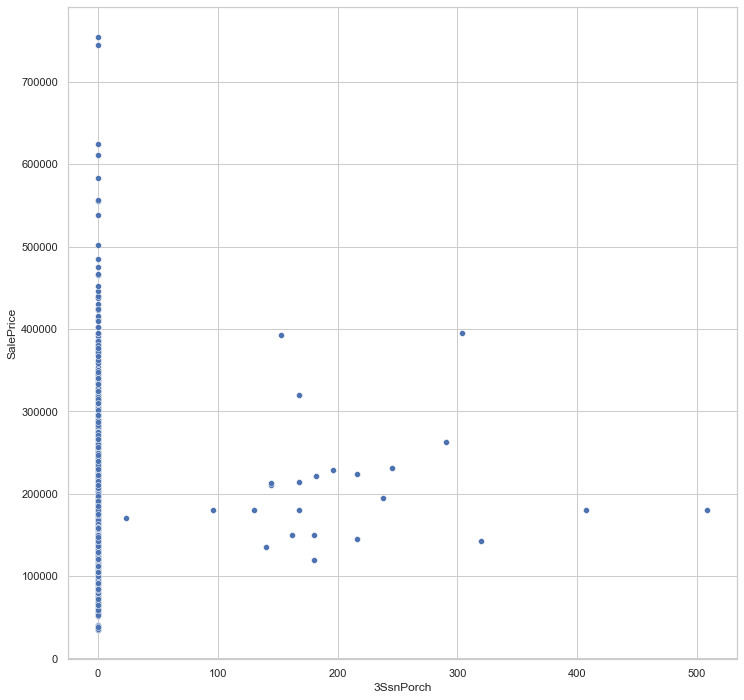

In [97]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df['3SsnPorch'], y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

71. ScreenPorch: numérica

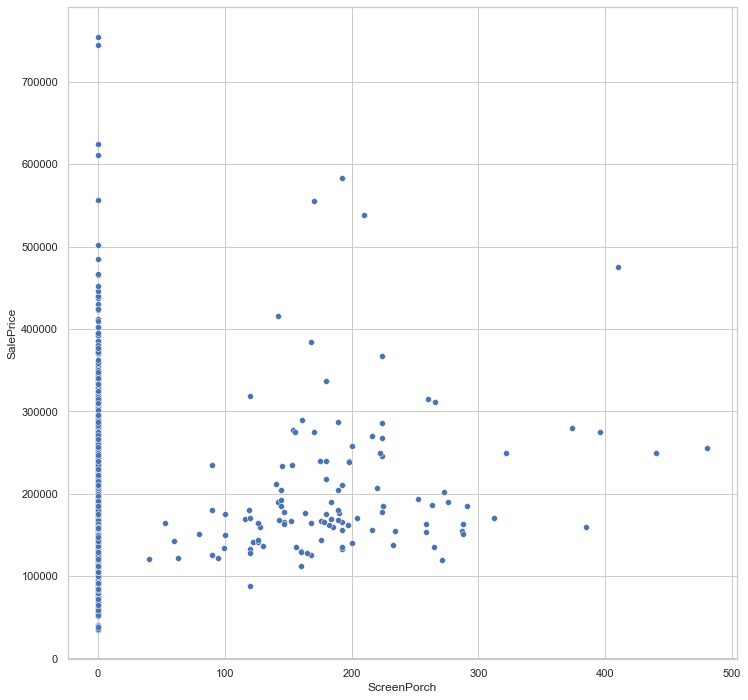

In [98]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.ScreenPorch, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

72. PoolArea: numérica

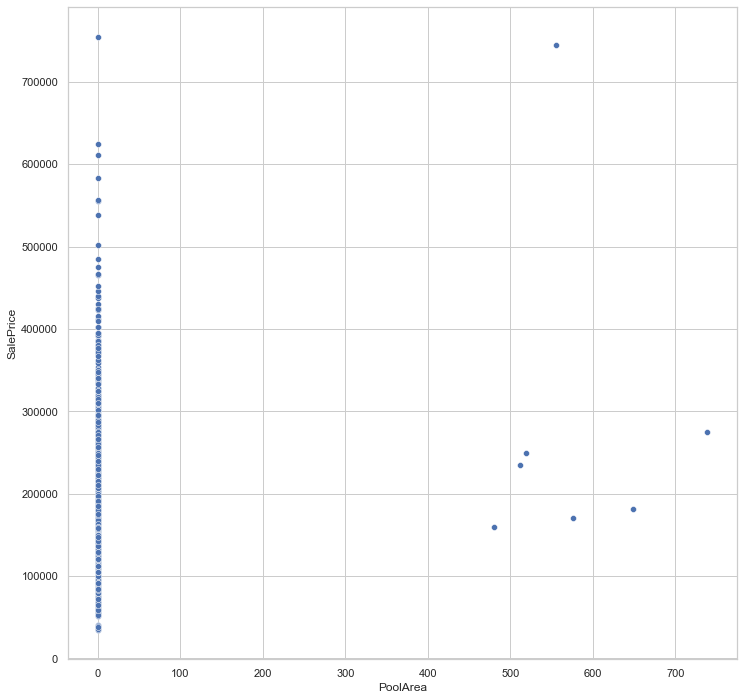

In [99]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.PoolArea, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta por el momento, pero es posible que se considere como variable binaria

73. PoolQC: categórica ordinal

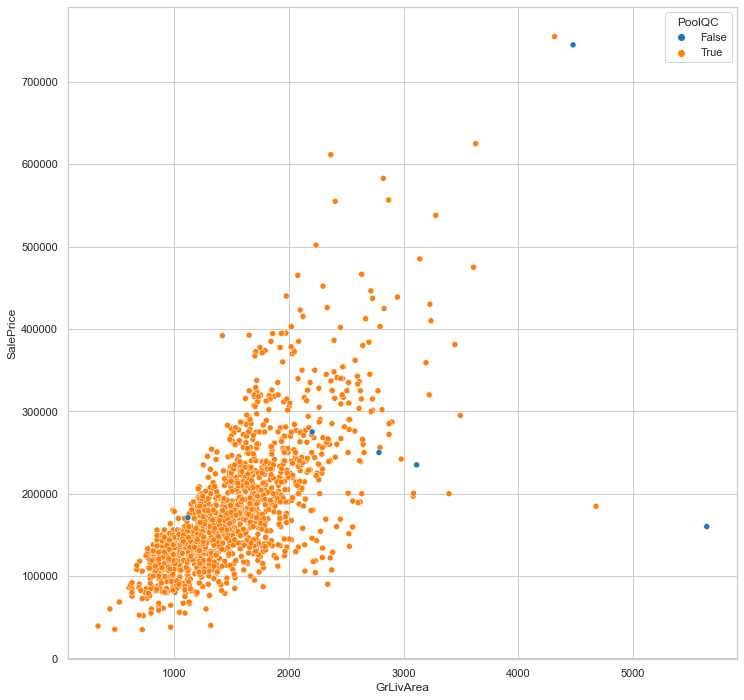

In [101]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.PoolQC.isna(),palette="tab10")
plt.show()

Se incluirá como binaria

74. Fence: categórica ordinal

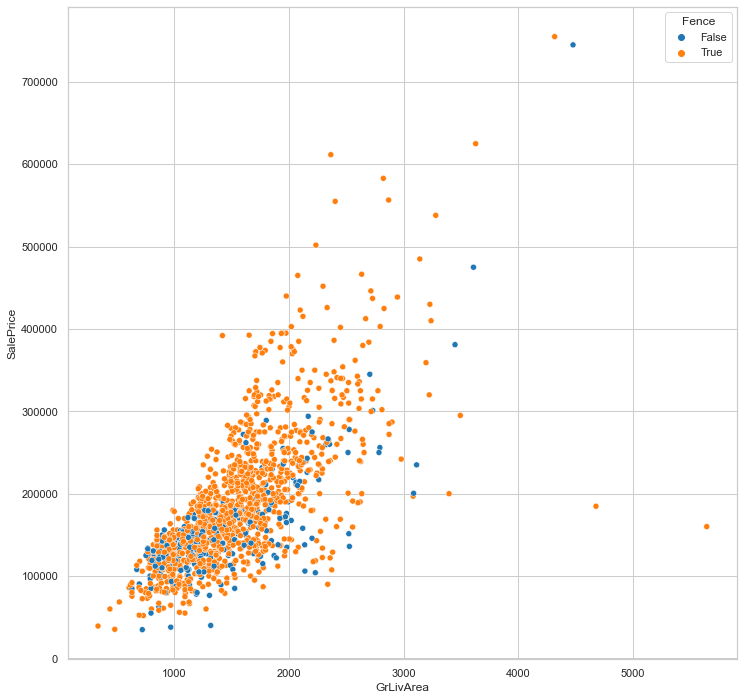

In [103]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.Fence.isna(),palette="tab10")
plt.show()

Se descarta

75. MiscFeature: categórica nominal

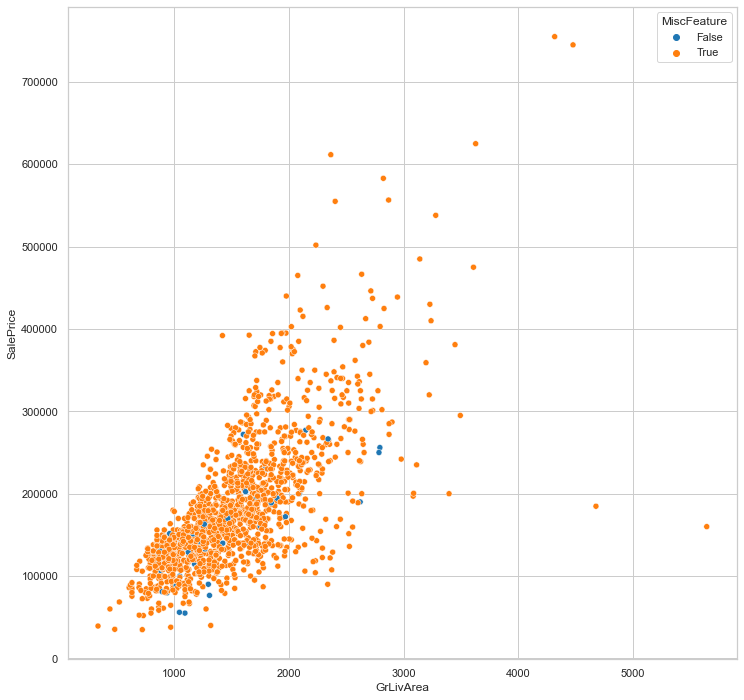

In [105]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.MiscFeature.isna(),palette="tab10")
plt.show()

Se descarta

76. MiscVal: numérica

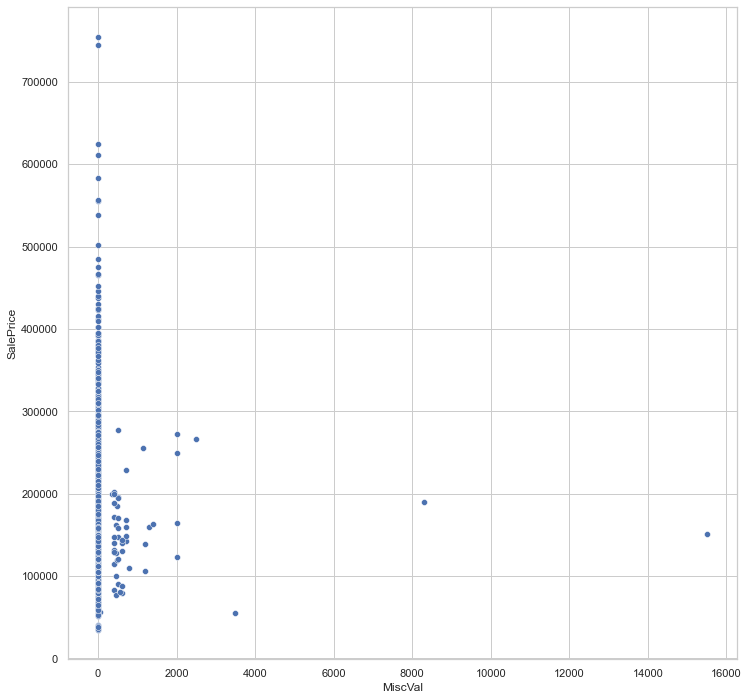

In [106]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.MiscVal, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

77. MoSold: numérica

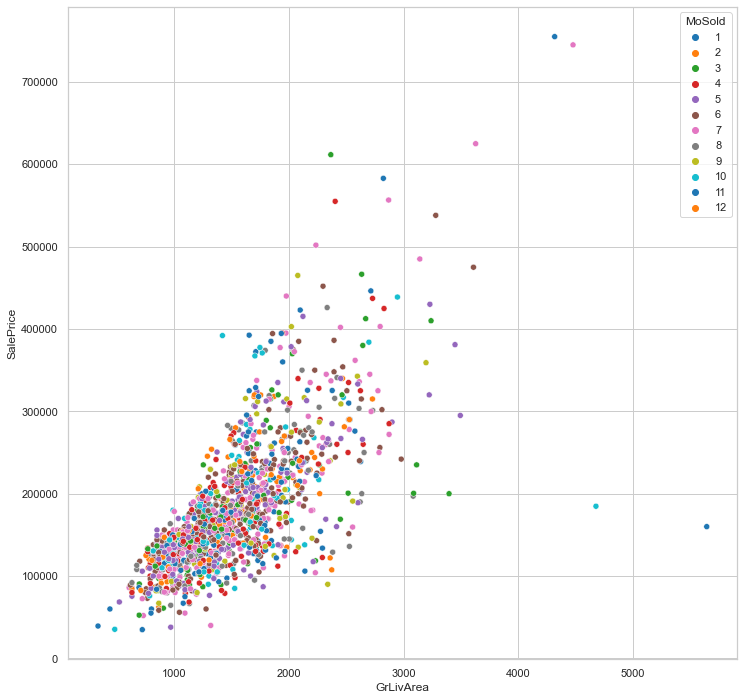

In [107]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.MoSold,palette="tab10")
plt.show()

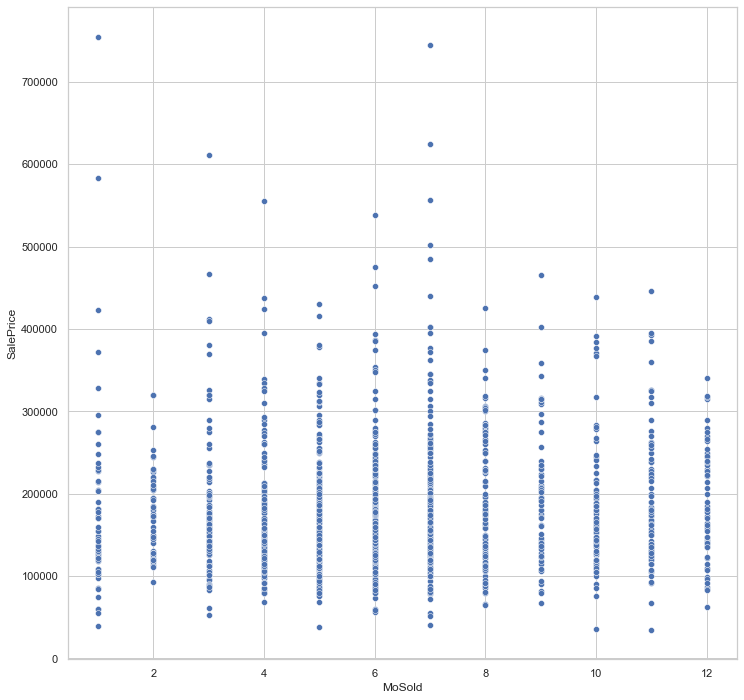

In [108]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.MoSold, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

78. YrSold: numérica

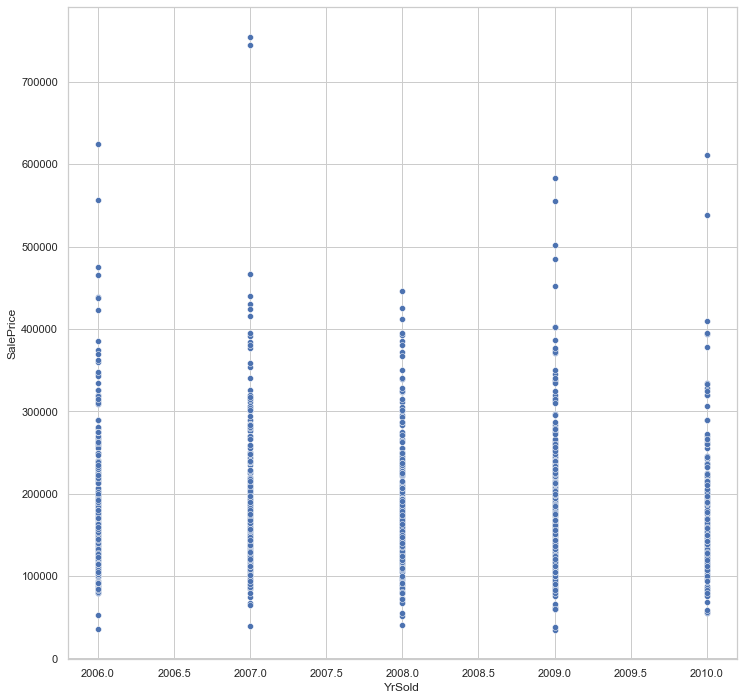

In [109]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.YrSold, y=df.SalePrice,palette="tab10")
plt.show()

Se descarta

79. SaleType: categórica nominal

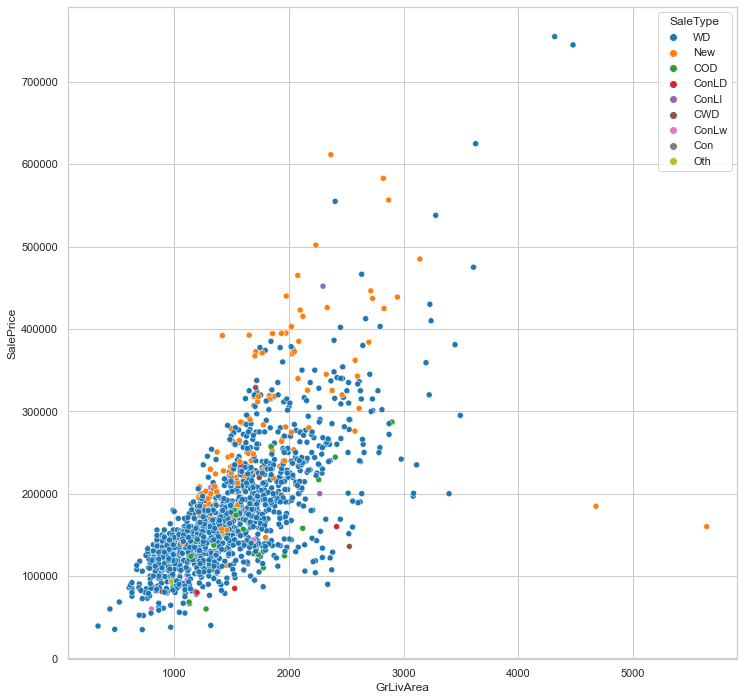

In [110]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.SaleType,palette="tab10")
plt.show()

Se mantiene pero se agregarán en 5 categorías: New, WD, Con, COD, y Other

80. SaleCondition: categórica nominal

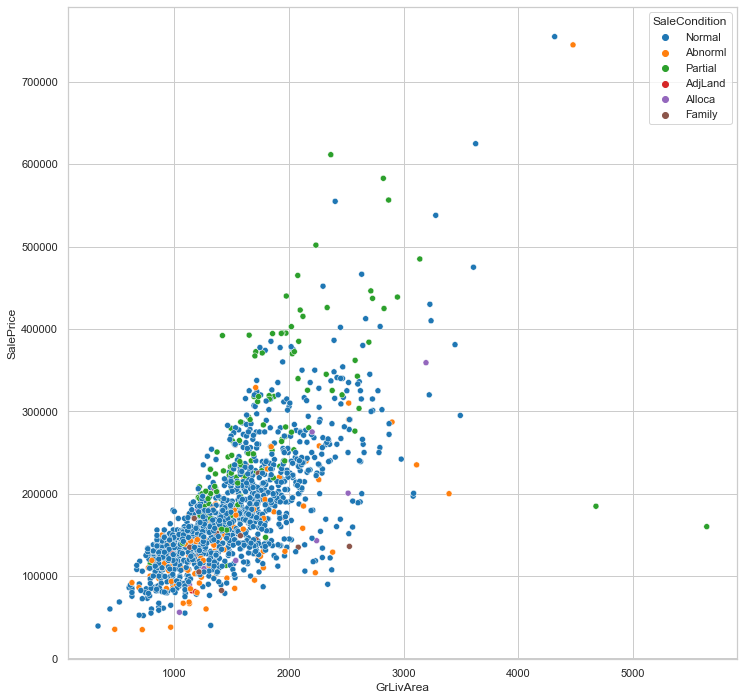

In [111]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df.GrLivArea, y=df.SalePrice,hue=df.SaleCondition,palette="tab10")
plt.show()

Se mantiene, pero se debe transformar

### Paso 4: Preprocesamiento

Lo primero será descartar las columnas que no serán tomadas en cuenta

In [214]:
df_ml = df.drop(columns = ['Id','LotFrontage','Alley','LotConfig','LandSlope','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','BsmtCond','BsmtFinType2','BsmtFinSF2',
                        'BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageYrBlt',
                        'GarageArea','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','Fence','MiscFeature','MiscVal','MoSold','YrSold'])

a) Valores faltantes

In [215]:
df_ml.isna().sum().sort_values(ascending=False)[df_ml.isna().sum() > 0]

PoolQC          1453
GarageQual        81
GarageType        81
GarageFinish      81
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
MasVnrType         8
MasVnrArea         8
Electrical         1
dtype: int64

Comenzamos con PoolQC

In [19]:
df_ml.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

Seguimos con BsmtExposure

In [33]:
df_ml.loc[df_ml.BsmtExposure.isna()]

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
17            90       RL    10791   Pave      Reg         Lvl    AllPub   
39            90       RL     6040   Pave      Reg         Lvl    AllPub   
90            20       RL     7200   Pave      Reg         Lvl    AllPub   
102           90       RL     7018   Pave      Reg         Bnk    AllPub   
156           20       RL     7200   Pave      Reg         Lvl    AllPub   
182           20       RL     9060   Pave      Reg         Lvl    AllPub   
259           20       RM    12702   Pave      Reg         Lvl    AllPub   
342           90       RL     8544   Pave      Reg         Lvl    AllPub   
362           85       RL     7301   Pave      Reg         Lvl    AllPub   
371           50       RL    17120   Pave      Reg         Lvl    AllPub   
392           20       RL     8339   Pave      IR1         Lvl    AllPub   
520          190       RL    10800   Pave      Reg         Lvl    AllPub   
532           20       RL     7200   Pave      Reg         Lvl    AllPub   
533           20       RL     5000   Pave      Reg         Low    AllPub   
553           20       RL     8777   Pave      Reg         Lvl    AllPub   
646           20       RL     7200   Pave      Reg         Lvl    AllPub   
705          190       RM     5600   Pave      Reg         Lvl    AllPub   
736           90       RL     8544   Pave      Reg         Lvl    AllPub   
749           50       RL     8405   Pave      Reg         Lvl    AllPub   
778           90       RH     8400   Pave      Reg         Lvl    AllPub   
868           60       RL    14762   Pave      IR2         Lvl    AllPub   
894           90       RL     7018   Pave      Reg         Bnk    AllPub   
897           90       RL     7018   Pave      Reg         Lvl    AllPub   
948           60       RL    14006   Pave      IR1         Lvl    AllPub   
984           90       RL    10125   Pave      Reg         Lvl    AllPub   
1000          20       RL    10206   Pave      Reg         Lvl    AllPub   
1011          90       RL     9825   Pave      Reg         Lvl    AllPub   
1035          20       RL    11500   Pave      IR1         Lvl    AllPub   
1045          20       RL    13680   Pave      IR1         Lvl    AllPub   
1048          20       RL    21750   Pave      Reg         Lvl    AllPub   
1049          20       RL    11100   Pave      Reg         Low    AllPub   
1090          90       RL     8544   Pave      Reg         Lvl    AllPub   
1179          20       RL     8335   Pave      Reg         Lvl    AllPub   
1216          90       RM     8930   Pave      Reg         Lvl    AllPub   
1218          50       RM     6240   Pave      Reg         Lvl    AllPub   
1232          90       RL     9842   Pave      Reg         Lvl    AllPub   
1321          20       RL     6627   Pave      IR1         Lvl    AllPub   
1412          90       RL     7200   Pave      Reg         Lvl    AllPub   

     Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
17         Sawyer       Norm       Norm   Duplex     1Story            4   
39        Edwards       Norm       Norm   Duplex     1Story            4   
90          NAmes       Norm       Norm     1Fam     1Story            4   
102       SawyerW       Norm       Norm   Duplex     1Story            5   
156         NAmes       Norm       Norm     1Fam     1Story            5   
182       Edwards     Artery       Norm     1Fam     1Story            5   
259       OldTown       Norm       Norm     1Fam     1Story            5   
342         NAmes       Norm       Norm   Duplex     1Story            3   
362       Edwards       Norm       Norm     1Fam     SFoyer            7   
371       ClearCr      Feedr       Norm     1Fam     1.5Fin            4   
392         NAmes       Norm       Norm     1Fam     1Story            5   
520       OldTown       Norm       Norm   2fmCon     2Story            4   
532         NAmes       Norm       Norm     1Fam     

Eliminamos el registro 948 por la inconsistencia en la columna BsmtExposure

In [216]:
df_ml.drop (948,axis=0,inplace=True)

Seguimos con MasVnrType

In [12]:
df_ml.loc[df.MasVnrType.isna()]

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
234           60       RL     7851   Pave      Reg         Lvl    AllPub   
529           20       RL    32668   Pave      IR1         Lvl    AllPub   
650           60       FV     8125   Pave      Reg         Lvl    AllPub   
936           20       RL    10083   Pave      Reg         Lvl    AllPub   
973           20       FV    11639   Pave      Reg         Lvl    AllPub   
977          120       FV     4274   Pave      IR1         Lvl    AllPub   
1243          20       RL    13891   Pave      Reg         Lvl    AllPub   
1278          60       RL     9473   Pave      Reg         Lvl    AllPub   

     Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
234       Gilbert       Norm       Norm     1Fam     2Story            6   
529       Crawfor       Norm       Norm     1Fam     1Story            6   
650       Somerst       Norm       Norm     1Fam     2Story            7   
936       SawyerW       Norm       Norm     1Fam     1Story            7   
973       Somerst       Norm       Norm     1Fam     1Story            7   
977       Somerst       Norm       Norm   TwnhsE     1Story            7   
1243      NridgHt       Norm       Norm     1Fam     1Story           10   
1278      CollgCr       Norm       Norm     1Fam     2Story            8   

      OverallCond  YearBuilt  YearRemodAdd MasVnrType  MasVnrArea ExterQual  \
234             5       2002          2002        NaN         NaN        Gd   
529             3       1957          1975        NaN         NaN        Gd   
650             6       2007          2007        NaN         NaN        Gd   
936             5       2003          2003        NaN         NaN        Gd   
973             5       2007          2008        NaN         NaN        Gd   
977             5       2006          2007        NaN         NaN        Gd   
1243            5       2006          2006        NaN         NaN        Ex   
1278            5       2002          2002        NaN         NaN        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
234         TA      PConc       Gd       TA           No          GLQ   
529         TA      PConc       TA       TA           No          Rec   
650         TA      PConc       Gd       TA           No          Unf   
936         TA      PConc       Gd       TA           No          GLQ   
973         TA      PConc       Gd       TA           No          Unf   
977         TA      PConc       Gd       TA           No          GLQ   
1243        TA      PConc       Ex       Gd           Gd          GLQ   
1278        TA      PConc       Gd       TA           No          GLQ   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
234          625        235          860    GasA        Ex          Y   
529         1219        816         2035    GasA        TA          Y   
650            0        813          813    GasA        Ex          Y   
936          833        343         1176    GasA        Ex          Y   
973            0       1428         1428    GasA        Ex          Y   
977         1106        135         1241    GasA        Ex          Y   
1243        1386        690         2076    GasA        Ex          Y   
1278         804        324         1128    GasA        Ex          Y   

     Electrical  GrLivArea  BsmtFullBath  KitchenAbvGr KitchenQual Functional  \
234       SBrkr       1960             1             1          Gd        Typ   
529       SBrkr       2515             1             2          TA       Maj1   
650       SBrkr       1665             0             1          Gd        Typ   
936       SBrkr       1200             1             1          Gd        Typ   
973       SBrkr       1428             0             1          Gd        Typ   
977       SBrkr       1241             1             1          Gd        Typ   
1243      SBrkr       2076             1 

In [217]:
df_ml.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

Asumimos que nan == 'None' y llenamos estos registros, así como MasVnrArea con 0

In [218]:
df_ml.MasVnrType.fillna('None',inplace=True)
df_ml.MasVnrArea.fillna(0,inplace=True)

Terminamos con electrical

In [219]:
df_ml.dropna(subset=['Electrical'],inplace=True)

Chequeamos

In [220]:
df_ml.isna().sum().sort_values(ascending=False)[df_ml.isna().sum() > 0]

PoolQC          1451
GarageQual        81
GarageFinish      81
GarageType        81
BsmtExposure      37
BsmtQual          37
BsmtFinType1      37
dtype: int64

b) Transformación

Comenzaremos por transformar las columnas binarias

1. Street

In [86]:
df_ml.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [221]:
df_ml.Street = df_ml.Street.apply(lambda x: 0 if x == 'Grvl' else 1)

In [40]:
df_ml.Street.unique()

array([1, 0], dtype=int64)

2. LotShape

In [28]:
df_ml.LotShape.unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [222]:
df_ml.LotShape = df_ml.LotShape.apply(lambda x: 0 if x == 'Reg' else 1)

In [42]:
df_ml.LotShape.unique()

array([0, 1], dtype=int64)

3. LandContour

In [43]:
df_ml.LandContour.unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [223]:
df_ml.LandContour = df_ml.LandContour.apply(lambda x: 0 if x == 'Lvl' else 1)

In [45]:
df_ml.LandContour.unique()

array([0, 1], dtype=int64)

4. Utilities

In [46]:
df_ml.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [224]:
df_ml.Utilities = df_ml.Utilities.apply(lambda x: 1 if x == 'AllPub' else 0)

In [48]:
df_ml.Utilities.unique()

array([1, 0], dtype=int64)

5. MasVnrType

In [49]:
df_ml.MasVnrType.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [225]:
df_ml.MasVnrType = df_ml.MasVnrType.apply(lambda x: 0 if x == 'None' else 1)

In [51]:
df_ml.MasVnrType.unique()

array([1, 0], dtype=int64)

6. BsmtFinType1

In [52]:
df_ml.BsmtFinType1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [226]:
df_ml.BsmtFinType1 = df_ml.BsmtFinType1.apply(lambda x: 1 if x == 'GLQ' else 0)

In [54]:
df_ml.BsmtFinType1.unique()

array([1, 0], dtype=int64)

7. Heating

In [61]:
df_ml.Heating.unique()

array(['GasA', 'GasW', 'Grav', 'Wall', 'OthW', 'Floor'], dtype=object)

In [227]:
df_ml.Heating = df_ml.Heating.apply(lambda x: 1 if x == 'GasA' else 0)

In [63]:
df_ml.Heating.unique()

array([1, 0], dtype=int64)

8. CentralAir

In [64]:
df_ml.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [228]:
df_ml.CentralAir = df_ml.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)

In [66]:
df_ml.CentralAir.unique()

array([1, 0], dtype=int64)

9. Electrical

In [67]:
df_ml.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [229]:
df_ml.Electrical = df_ml.Electrical.apply(lambda x: 1 if x == 'SBrkr' else 0)

In [69]:
df_ml.Electrical.unique()

array([1, 0], dtype=int64)

10. BsmtFullBath

In [70]:
df_ml.BsmtFullBath.unique()

array([1, 0, 2, 3], dtype=int64)

In [230]:
df_ml.BsmtFullBath = df_ml.BsmtFullBath.apply(lambda x: 0 if x == 0 else 1)

In [72]:
df_ml.BsmtFullBath.unique()

array([1, 0], dtype=int64)

11. KitchenAbvGr

In [73]:
df_ml.KitchenAbvGr.unique()

array([1, 2, 3, 0], dtype=int64)

In [231]:
df_ml.KitchenAbvGr = df_ml.KitchenAbvGr.apply(lambda x: 0 if x == 0 else 1)

In [75]:
df_ml.KitchenAbvGr.unique()

array([1, 0], dtype=int64)

12. Functional

In [76]:
df_ml.Functional.unique()

array(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev'], dtype=object)

In [232]:
df_ml.Functional = df_ml.Functional.apply(lambda x: 1 if x == 'Typ' else 0)

In [78]:
df_ml.Functional.unique()

array([1, 0], dtype=int64)

13. PoolQC

In [108]:
df_ml.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [233]:
df_ml.PoolQC = df_ml.PoolQC.apply(lambda x: 1 if (x == 'Ex' or x == 'Fa' or x == 'Gd' or x == 'TA') else 0)

In [114]:
df_ml.PoolQC.unique()

array([0, 1], dtype=int64)

Continuamos con las variables que debemos numerar

1. ExterQual

In [117]:
df_ml.ExterQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [234]:
dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_ml.ExterQual = df_ml.ExterQual.map(dicc)

In [119]:
df_ml.ExterQual.unique()

array([4, 3, 5, 2], dtype=int64)

2. BsmtQual

In [120]:
df_ml.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [235]:
dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_ml.BsmtQual = df_ml.BsmtQual.map(dicc)
df_ml.BsmtQual.fillna(0,inplace=True)

In [124]:
df_ml.BsmtQual.unique()

array([4., 3., 5., 0., 2.])

3. BsmtExposure

In [125]:
df_ml.BsmtExposure.unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [236]:
dicc = {'Gd': 4,'Av': 3,'Mn': 2,'No': 1}
df_ml.BsmtExposure = df_ml.BsmtExposure.map(dicc)
df_ml.BsmtExposure.fillna(0,inplace=True)

In [127]:
df_ml.BsmtExposure.unique()

array([1., 4., 2., 3., 0.])

4. HeatingQC

In [128]:
df_ml.HeatingQC.unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [237]:
dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_ml.HeatingQC = df_ml.HeatingQC.map(dicc)

In [130]:
df_ml.HeatingQC.unique()

array([5, 4, 3, 2, 1], dtype=int64)

5. KitchenQual

In [131]:
df_ml.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [238]:
dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_ml.KitchenQual = df_ml.KitchenQual.map(dicc)

In [133]:
df_ml.KitchenQual.unique()

array([4, 3, 5, 2], dtype=int64)

6. GarageFinish

In [134]:
df_ml.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [239]:
dicc = {'Fin': 3,'RFn': 2,'Unf': 1}
df_ml.GarageFinish = df_ml.GarageFinish.map(dicc)
df_ml.GarageFinish.fillna(0,inplace=True)

In [136]:
df_ml.GarageFinish.unique()

array([2., 1., 3., 0.])

7. GarageQual

In [137]:
df_ml.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [240]:
dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_ml.GarageQual = df_ml.GarageQual.map(dicc)
df_ml.GarageQual.fillna(0,inplace=True)

In [139]:
df_ml.GarageQual.unique()

array([3., 2., 4., 0., 5., 1.])

Continuamos con las variables que se deben agregar y posteriormente numerar o codificar (dummies)

1. Condition1

In [140]:
df_ml.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

Se les asignará -1 a las categorías que se consideran negativas (cercanas a vías rápidas o de tren), 0 a Normal, y 1 categorías positivas

In [241]:
dicc = {'Artery':-1,'Feedr':-1,'Norm':0,'RRNn':-1,'RRAn':-1,'PosN':1,'PosA':1,'RRNe':-1,'RRAe':-1}
df_ml.Condition1 = df_ml.Condition1.map(dicc)

In [142]:
df_ml.Condition1.unique()

array([ 0, -1,  1], dtype=int64)

2. Condition2

In [143]:
df_ml.Condition2.unique()

array(['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe'],
      dtype=object)

Igual que la anterior

In [242]:
dicc = {'Artery':-1,'Feedr':-1,'Norm':0,'RRNn':-1,'RRAn':-1,'PosN':1,'PosA':1,'RRNe':-1,'RRAe':-1}
df_ml.Condition2 = df_ml.Condition2.map(dicc)

In [145]:
df_ml.Condition2.unique()

array([ 0, -1,  1], dtype=int64)

3. BldgType

In [146]:
df_ml.BldgType.unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

Se unificarán las viviendas de 2 familias y los townhouses. En el siguiente paso se harán las variables dummy

In [243]:
df_ml.BldgType = df_ml.BldgType.replace(['2fmCon','TwnhsE'],['Duplex','Twnhs'])

In [149]:
df_ml.BldgType.unique()

array(['1Fam', 'Duplex', 'Twnhs'], dtype=object)

4. HouseStyle

In [150]:
df_ml.HouseStyle.unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

Se agregarán en 5 categorías: 1Story, 1.5St, 2Story, 2.5St, y Split. Luego se harán dummies

In [244]:
df_ml.HouseStyle = df_ml.HouseStyle.replace(['1.5Fin','1.5Unf'],'1.5St')
df_ml.HouseStyle = df_ml.HouseStyle.replace(['2.5Fin','2.5Unf'],'2.5St')
df_ml.HouseStyle = df_ml.HouseStyle.replace(['SFoyer','SLvl'],'Split')

In [154]:
df_ml.HouseStyle.unique()

array(['2Story', '1Story', '1.5St', 'Split', '2.5St'], dtype=object)

5. SaleType

In [155]:
df_ml.SaleType.unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

Se agregarán en 5 categorías: New, WD, Con, COD, y Other

In [245]:
df_ml.SaleType = df_ml.SaleType.replace(['ConLD','ConLI','ConLw'],'Con')
df_ml.SaleType = df_ml.SaleType.replace('CWD','WD')

In [157]:
df_ml.SaleType.unique()

array(['WD', 'New', 'COD', 'Con', 'Oth'], dtype=object)

Finalmente, se harán las variables dummies

1. MSZoning

In [246]:
zoning_dummies = pd.get_dummies(df_ml.MSZoning)

2. Neighborhood

In [247]:
neighborhood_dummies = pd.get_dummies(df_ml.Neighborhood)

3. Foundation

In [248]:
foundation_dummies = pd.get_dummies(df_ml.Foundation)

4. GarageType

In [249]:
garagetype_dummies = pd.get_dummies(df_ml.GarageType)

5. PavedDrive

In [250]:
paveddrive_dummies = pd.get_dummies(df_ml.PavedDrive)

6. SaleCondition

In [251]:
scalecondition_dummies = pd.get_dummies(df_ml.SaleCondition)

7. BldgType

In [252]:
bldgtype_dummies = pd.get_dummies(df_ml.BldgType)

8. HouseStyle

In [253]:
housestyle_dummies = pd.get_dummies(df_ml.HouseStyle)

9. SaleType

In [254]:
saletype_dummies = pd.get_dummies(df_ml.SaleType)

Por último, se concatenan los dataframes y se droppean las columnas originales

In [255]:
df_ml = pd.concat([df_ml,zoning_dummies,neighborhood_dummies,foundation_dummies,garagetype_dummies,paveddrive_dummies,
                    scalecondition_dummies,bldgtype_dummies,housestyle_dummies,saletype_dummies],axis=1)
df_ml = df_ml.drop(columns=['MSZoning','Neighborhood','Foundation','GarageType','PavedDrive','SaleCondition','BldgType','HouseStyle','SaleType'])

In [256]:
df_ml

MSSubClass  LotArea  Street  LotShape  LandContour  Utilities  \
0             60     8450       1         0            0          1   
1             20     9600       1         0            0          1   
2             60    11250       1         1            0          1   
3             70     9550       1         1            0          1   
4             60    14260       1         1            0          1   
...          ...      ...     ...       ...          ...        ...   
1455          60     7917       1         0            0          1   
1456          20    13175       1         0            0          1   
1457          70     9042       1         0            0          1   
1458          20     9717       1         0            0          1   
1459          20     9937       1         0            0          1   

      Condition1  Condition2  OverallQual  OverallCond  YearBuilt  \
0              0           0            7            5       2003   
1             -1           0            6            8       1976   
2              0           0            7            5       2001   
3              0           0            7            5       1915   
4              0           0            8            5       2000   
...          ...         ...          ...          ...        ...   
1455           0           0            6            5       1999   
1456           0           0            6            6       1978   
1457           0           0            7            9       1941   
1458           0           0            5            6       1950   
1459           0           0            5            6       1965   

      YearRemodAdd  MasVnrType  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  \
0             2003           1       196.0          4       4.0           1.0   
1             1976           0         0.0          3       4.0           4.0   
2             2002           1       162.0          4       4.0           2.0   
3             1970           0         0.0          3       3.0           1.0   
4             2000           1       350.0          4       4.0           3.0   
...            ...         ...         ...        ...       ...           ...   
1455          2000           0         0.0          3       4.0           1.0   
1456          1988           1       119.0          3       4.0           1.0   
1457          2006           0         0.0          5       3.0           1.0   
1458          1996           0         0.0          3       3.0           2.0   
1459          1965           0         0.0          4       3.0           1.0   

      BsmtFinType1  BsmtFinSF1  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0                1         706          856        1          5           1   
1                0         978         1262        1          5           1   
2                1         486          920        1          5           1   
3                0         216          756        1          4           1   
4                1         655         1145        1          5           1   
...            ...         ...          ...      ...        ...         ...   
1455             0           0          953        1          5           1   
1456             0         790         1542        1          3           1   
1457             1         275         1152        1          5           1   
1458             1          49         1078        1          4           1   
1459             0         830         1256        1          4           1   

      Electrical  GrLivArea  BsmtFullBath  KitchenAbvGr  KitchenQual  \
0              1       1710             1             1            4   
1              1       1262             0             1            3   
2              1       1786             1             1            4   
3              1       1717             1             1            4   
4              1       2198             1 

In [257]:
X = df_ml.drop(columns='SalePrice')
y = df_ml.SalePrice

### Paso 5: Modelado

Comenzamos por importar algunas librerías. Se decidió utilizar Random Forest Regressor por ser más preciso que una regresión lineal, trabaja mejor con múltiples variables, y además no es tan sensible a outliers

In [195]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

Dividemos nuestro dataset en train y test

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Instanciamos el modelo y entrenamos

In [259]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

Predecimos y evaluamos

In [260]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Error en datos de train:', np.sqrt(mean_squared_log_error(y_train, y_train_pred)))
print('Error en datos de test:', np.sqrt(mean_squared_log_error(y_test, y_test_pred)))

Error en datos de train: 0.06153045940853632
Error en datos de test: 0.14035443298539754


### Paso 6: Evaluación

Se logró con este primer modelos un RMSLE de **0.14035** en los datos de test. Se seguirán realizando iteraciones para mejorar el modelo

### Paso 7: Predicción

Por último, se realizará la importación y transformación de los datos test para enviar las predicciones al equipo organizador del Hackathon

In [261]:
df_test = pd.read_csv('houses_test_raw.csv')
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

Transformamos según las pautas empleadas en el Paso 4

In [262]:
# Eliminamos las columnas que se consideraron innecesarias
df_test = df.drop(columns = ['Id','LotFrontage','Alley','LotConfig','LandSlope','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterCond','BsmtCond','BsmtFinType2','BsmtFinSF2',
                        'BsmtUnfSF','1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageYrBlt',
                        'GarageArea','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','Fence','MiscFeature','MiscVal','MoSold','YrSold'])

# Tratamos datos vacíos
df_test.MasVnrType.fillna('None',inplace=True)
df_test.MasVnrArea.fillna(0,inplace=True)

# Transformamos las columnas que identificamos como binarias

df_test.Street = df_test.Street.apply(lambda x: 0 if x == 'Grvl' else 1)
df_test.LotShape = df_test.LotShape.apply(lambda x: 0 if x == 'Reg' else 1)
df_test.LandContour = df_test.LandContour.apply(lambda x: 0 if x == 'Lvl' else 1)
df_test.Utilities = df_test.Utilities.apply(lambda x: 1 if x == 'AllPub' else 0)
df_test.MasVnrType = df_test.MasVnrType.apply(lambda x: 0 if x == 'None' else 1)
df_test.BsmtFinType1 = df_test.BsmtFinType1.apply(lambda x: 1 if x == 'GLQ' else 0)
df_test.Heating = df_test.Heating.apply(lambda x: 1 if x == 'GasA' else 0)
df_test.CentralAir = df_test.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)
df_test.Electrical = df_test.Electrical.apply(lambda x: 1 if x == 'SBrkr' else 0)
df_test.BsmtFullBath = df_test.BsmtFullBath.apply(lambda x: 0 if x == 0 else 1)
df_test.KitchenAbvGr = df_test.KitchenAbvGr.apply(lambda x: 0 if x == 0 else 1)
df_test.Functional = df_test.Functional.apply(lambda x: 1 if x == 'Typ' else 0)
df_test.PoolQC = df_test.PoolQC.apply(lambda x: 1 if (x == 'Ex' or x == 'Fa' or x == 'Gd' or x == 'TA') else 0)

# Transformamos las columnas que identificamos como ordinales

dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_test.ExterQual = df_test.ExterQual.map(dicc)

dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_test.BsmtQual = df_test.BsmtQual.map(dicc)
df_test.BsmtQual.fillna(0,inplace=True)

dicc = {'Gd': 4,'Av': 3,'Mn': 2,'No': 1}
df_test.BsmtExposure = df_test.BsmtExposure.map(dicc)
df_test.BsmtExposure.fillna(0,inplace=True)

dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_test.HeatingQC = df_test.HeatingQC.map(dicc)

dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_test.KitchenQual = df_test.KitchenQual.map(dicc)

dicc = {'Fin': 3,'RFn': 2,'Unf': 1}
df_test.GarageFinish = df_test.GarageFinish.map(dicc)
df_test.GarageFinish.fillna(0,inplace=True)

dicc = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1}
df_test.GarageQual = df_test.GarageQual.map(dicc)
df_test.GarageQual.fillna(0,inplace=True)

# Transformamos las columnas donde agregamos categorías

dicc = {'Artery':-1,'Feedr':-1,'Norm':0,'RRNn':-1,'RRAn':-1,'PosN':1,'PosA':1,'RRNe':-1,'RRAe':-1}
df_test.Condition1 = df_test.Condition1.map(dicc)

dicc = {'Artery':-1,'Feedr':-1,'Norm':0,'RRNn':-1,'RRAn':-1,'PosN':1,'PosA':1,'RRNe':-1,'RRAe':-1}
df_test.Condition2 = df_test.Condition2.map(dicc)

df_test.BldgType = df_test.BldgType.replace(['2fmCon','TwnhsE'],['Duplex','Twnhs'])

df_test.HouseStyle = df_test.HouseStyle.replace(['1.5Fin','1.5Unf'],'1.5St')
df_test.HouseStyle = df_test.HouseStyle.replace(['2.5Fin','2.5Unf'],'2.5St')
df_test.HouseStyle = df_test.HouseStyle.replace(['SFoyer','SLvl'],'Split')

df_test.SaleType = df_test.SaleType.replace(['ConLD','ConLI','ConLw'],'Con')
df_test.SaleType = df_test.SaleType.replace('CWD','WD')

# Creamos las variables dummy

zoning_dummies = pd.get_dummies(df_test.MSZoning)
neighborhood_dummies = pd.get_dummies(df_test.Neighborhood)
foundation_dummies = pd.get_dummies(df_test.Foundation)
garagetype_dummies = pd.get_dummies(df_test.GarageType)
paveddrive_dummies = pd.get_dummies(df_test.PavedDrive)
scalecondition_dummies = pd.get_dummies(df_test.SaleCondition)
bldgtype_dummies = pd.get_dummies(df_test.BldgType)
housestyle_dummies = pd.get_dummies(df_test.HouseStyle)
saletype_dummies = pd.get_dummies(df_test.SaleType)

# Concatemos los dataframes y borramos las columnas originales

df_test = pd.concat([df_test,zoning_dummies,neighborhood_dummies,foundation_dummies,garagetype_dummies,paveddrive_dummies,
                    scalecondition_dummies,bldgtype_dummies,housestyle_dummies,saletype_dummies],axis=1)
df_test = df_test.drop(columns=['MSZoning','Neighborhood','Foundation','GarageType','PavedDrive','SaleCondition','BldgType','HouseStyle','SaleType'])

Comprobamos

In [264]:
df_test

MSSubClass  LotArea  Street  LotShape  LandContour  Utilities  \
0             60     8450       1         0            0          1   
1             20     9600       1         0            0          1   
2             60    11250       1         1            0          1   
3             70     9550       1         1            0          1   
4             60    14260       1         1            0          1   
...          ...      ...     ...       ...          ...        ...   
1455          60     7917       1         0            0          1   
1456          20    13175       1         0            0          1   
1457          70     9042       1         0            0          1   
1458          20     9717       1         0            0          1   
1459          20     9937       1         0            0          1   

      Condition1  Condition2  OverallQual  OverallCond  YearBuilt  \
0              0           0            7            5       2003   
1             -1           0            6            8       1976   
2              0           0            7            5       2001   
3              0           0            7            5       1915   
4              0           0            8            5       2000   
...          ...         ...          ...          ...        ...   
1455           0           0            6            5       1999   
1456           0           0            6            6       1978   
1457           0           0            7            9       1941   
1458           0           0            5            6       1950   
1459           0           0            5            6       1965   

      YearRemodAdd  MasVnrType  MasVnrArea  ExterQual  BsmtQual  BsmtExposure  \
0             2003           1       196.0          4       4.0           1.0   
1             1976           0         0.0          3       4.0           4.0   
2             2002           1       162.0          4       4.0           2.0   
3             1970           0         0.0          3       3.0           1.0   
4             2000           1       350.0          4       4.0           3.0   
...            ...         ...         ...        ...       ...           ...   
1455          2000           0         0.0          3       4.0           1.0   
1456          1988           1       119.0          3       4.0           1.0   
1457          2006           0         0.0          5       3.0           1.0   
1458          1996           0         0.0          3       3.0           2.0   
1459          1965           0         0.0          4       3.0           1.0   

      BsmtFinType1  BsmtFinSF1  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0                1         706          856        1          5           1   
1                0         978         1262        1          5           1   
2                1         486          920        1          5           1   
3                0         216          756        1          4           1   
4                1         655         1145        1          5           1   
...            ...         ...          ...      ...        ...         ...   
1455             0           0          953        1          5           1   
1456             0         790         1542        1          3           1   
1457             1         275         1152        1          5           1   
1458             1          49         1078        1          4           1   
1459             0         830         1256        1          4           1   

      Electrical  GrLivArea  BsmtFullBath  KitchenAbvGr  KitchenQual  \
0              1       1710             1             1            4   
1              1       1262             0             1            3   
2              1       1786             1             1            4   
3              1       1717             1             1            4   
4              1       2198             1 

Separamos la columna objetivo de los datos de entrada

In [265]:
X_test = df_test.drop(columns='SalePrice')
y_test = df_test.SalePrice

Predecimos

In [266]:
y_test_pred = rf.predict(X_test)
print('Error en datos de test:', np.sqrt(mean_squared_log_error(y_test, y_test_pred)))

Error en datos de test: 0.08354433979079005


Error final en datos test: **0.08354**

Guardamos la predicción en un csv

In [270]:
pred = pd.DataFrame(y_test_pred)
pred.to_csv('house_price_predictions.csv')

Y esperamos quedar en el Top 5 :)

Si leyeron hasta acá, muchas gracias y espero les haya gustado. Espero sus comentarios y recomendaciones